In [ ]:
# Notebook 2\5 

In [75]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [76]:
def add_prefix_to_columns(df, columns, prefix):
    # Add prefix to specified columns
    df = df.rename(columns={col: f"{prefix}{col}" for col in columns})
    return df

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df, columns):
    """
    Plots box plots for the specified columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to plot.
    """
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        
        # Check if the column name starts with 'Encoded'
        if column.startswith('Encoded'):
            title = f'Box Plot of {column.replace("_", " ").title()}'
            legend_text = (
                'Feature with nominal values should not be considered as continuous numeric - Ignore box plot, '
                'no meaning for the ordinal just labeling'
            )
            
            plt.title(title)
            plt.legend([legend_text], loc='upper right')
        else:
            plt.title(f'Box Plot of {column.replace("_", " ").title()}')
        
        plt.xlabel(column.replace("_", " ").title())
        plt.show()

In [78]:
import pandas as pd

def convert_columns_to_float64(df, columns):
    """
    Converts specified columns in the DataFrame to float64.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to convert.
    """
    for column in columns:
        if column in df.columns:
            df.loc[:, column] = df.loc[:, column].astype('float64')
        else:
            print(f"Warning: {column} is not in the DataFrame columns")


In [79]:
def get_categorical_df(df):
    """
    Extracts categorical columns from the DataFrame and returns a new DataFrame containing only those columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    pd.DataFrame: A DataFrame containing only the categorical columns.
    """
    # Select categorical columns
    categorical_df = df.select_dtypes(include=['object', 'category'])
    
    # Return the DataFrame with only categorical columns
    return categorical_df

In [80]:
import pandas as pd

def get_numeric_columns(df):
    """
    Returns a list of numeric columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    list: A list of column names that are numeric.
    """
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    return numeric_cols

In [81]:
import pandas as pd

def generate_csv_reports(df, prefix='IMDB'):
    """
    Generate CSV reports with various statistics from the DataFrame.
    
    Args:
    df (pd.DataFrame): The DataFrame to analyze.
    prefix (str): The prefix for the output CSV filenames.
    """
    # Data Types
    dtypes_df = df.dtypes.reset_index()
    dtypes_df.columns = ['Column', 'DataType']
    dtypes_df.to_csv(f"{prefix}_dtypes.csv", index=False, header=True)

    # Maximum Values (numeric only)
    df_max = df.max(numeric_only=True)
    df_max_df = df_max.reset_index()
    df_max_df.columns = ['Column', 'MaxValue']
    df_max_df.to_csv(f"{prefix}_max.csv", index=False)

    # Minimum Values (numeric only)
    df_min = df.min(numeric_only=True)
    df_min_df = df_min.reset_index()
    df_min_df.columns = ['Column', 'MinValue']
    df_min_df.to_csv(f"{prefix}_min.csv", index=False)

    # Missing Values
    df_missing = df.isnull().sum()
    df_missing_df = df_missing.reset_index()
    df_missing_df.columns = ['Column', 'MissingValues']
    df_missing_df.to_csv(f"{prefix}_NA.csv", index=False)

    # Unique Values
    df_unique = df.nunique()
    df_unique_df = df_unique.reset_index()
    df_unique_df.columns = ['Column', 'UniqueValues']
    df_unique_df.to_csv(f"{prefix}_unique.csv", index=False)

In [82]:
import pandas as pd

def categorize_series(df):
    """
    Add categorical columns for the number of seasons and episodes based on predefined bins.

    Args:
    df (pd.DataFrame): The DataFrame containing the columns 'number_of_seasons' and 'number_of_episodes'.

    Returns:
    pd.DataFrame: The DataFrame with added categorical columns 'seasons_category' and 'episodes_category'.
    """
    # Define bins and labels for number_of_seasons
    season_bins = [0, 1, 3, 10, 50, 100]
    season_labels = ['0-1', '1-3', '3-10', '10-50', '50-100']

    # Define bins and labels for number_of_episodes
    episode_bins = [0, 10, 50, 100, 500, 1000]
    episode_labels = ['0-10', '10-50', '50-100', '100-500', '500-1000']

    # Create categorical columns
    df['seasons_category'] = pd.cut(df['number_of_seasons'], bins=season_bins, labels=season_labels, right=False)
    df['episodes_category'] = pd.cut(df['number_of_episodes'], bins=episode_bins, labels=episode_labels, right=False)

    return df

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_binned_popularity(df, choose_bin="Low"):
    """
    Plots the binned distribution of the 'popularity' column in the DataFrame with dynamic binning.

    Parameters:
    - df: pandas DataFrame containing the 'popularity' column.
    - choose_bin: string, determines the binning strategy. Options are "High" and "Low".
    """
    # Calculate min and max dynamically
    max_popularity = df['popularity'].max()
    min_popularity = df['popularity'].min()
    range_popularity = max_popularity - min_popularity

    if choose_bin == "High":
        # High resolution: More bins, smaller bin size
        bin_size = 1  # Small bin size, adjust if needed
        num_bins = int(range_popularity // bin_size) + 1
    else:
        # Low resolution: Fewer bins, larger bin size
        num_bins = 5  # Number of bins, adjust based on desired coarseness
    
    # Create the bin edges
    bins = np.linspace(min_popularity, max_popularity, num_bins + 1)
    
    # Define labels for the bins
    labels = [f'{int(bins[i])}-{int(bins[i+1])-1}' for i in range(len(bins)-1)]

    # Bin the popularity values
    df['popularity_binned'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)

    # Plot the binned data using countplot
    plt.figure(figsize=(14, 7))
    sns.countplot(x='popularity_binned', data=df, color='red')
    plt.title('Binned Popularity Distribution')
    plt.xlabel('Popularity Range')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Output the binned column with NaNs to see where issues might arise
    nan_check = df[df['popularity_binned'].isna()]
    if not nan_check.empty:
        print(f"NaN values found in 'popularity_binned':")
        print(nan_check[['popularity', 'popularity_binned']])

# Example usage
# Assuming df is your DataFrame and 'popularity' is a column in it.
# df = pd.DataFrame({'popularity': np.random.randint(0, 100, size=100)})
# plot_binned_popularity(df, choose_bin="Low")


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_popularity_histogram(df, bins=1000, color='red'):
    """
    Plots the histogram of the 'popularity' column in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the 'popularity' column.
    - bins: int, number of bins for the histogram.
    - color: string, color for the histogram bars.
    """
    # Plot histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(df['popularity'], bins=bins, color=color, kde=False)  # Set color to specified value
    plt.title('Distribution of Popularity')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_popularity_by_encoded_languages(df):
    """
    Calculates and plots the average popularity by 'Encoded_languages_freq' with top 10 results,
    including continent and language information as labels.

    Parameters:
    - df: pandas DataFrame containing 'Encoded_languages_freq', 'popularity', and 'origin_continent' columns.
    """
    # Calculate the average popularity by Encoded_languages
    average_popularity_by_encoded_languages = df.groupby('Encoded_languages_freq')['popularity'].mean()

    # Sort the results in descending order and select the top 10
    top_10_average_popularity = average_popularity_by_encoded_languages.sort_values(ascending=False).head(10)
    
    # Create a DataFrame for the top 10 results to include continent and language information
    top_10_df = df[df['Encoded_languages_freq'].isin(top_10_average_popularity.index)]
    top_10_df = top_10_df.groupby('Encoded_languages_freq').agg({
        'popularity': 'mean',
        'origin_continent': 'first'  # Use the origin_continent column for labeling
    }).reindex(top_10_average_popularity.index)

    # Plotting the results
    plt.figure(figsize=(14, 8))
    
    # Plot: Average Popularity by Encoded Languages
    bars = plt.bar(top_10_average_popularity.index, top_10_average_popularity, color='lightgreen', edgecolor='black')
    
    # Add labels to each bar
    for bar in bars:
        height = bar.get_height()
        # Find the index of the current bar
        index = list(top_10_average_popularity.index).index(bar.get_x() + bar.get_width() / 2)
        # Get the encoded language frequency and continent from the DataFrame
        encoded_lang = top_10_average_popularity.index[index]
        label_continent = top_10_df.loc[encoded_lang, 'origin_continent']
        label_text = f"{encoded_lang}\n({label_continent})"
        plt.text(bar.get_x() + bar.get_width() / 2, height, label_text, ha='center', va='bottom', fontsize=10, color='black')

    # Adding legend
    plt.legend(['Encoded Languages with Continent'], loc='upper right')

    plt.title('Top 10 Average Popularity by Encoded Languages')
    plt.xlabel('Encoded Languages')
    plt.ylabel('Average Popularity')
    plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()







In [86]:
                #   End Function  #

In [87]:
# Final Flat File 
import pandas as pd
#load from pickle 
dfload1 = pd.read_pickle('cleaned_data_column_FlatFileRe_2015_2023.pkl')

# i removed it because i noticed that the pickle load columns that are deleted but i can see them ain - so using loiad excel till find the issue.
#dfload = pd.read_excel('cleaned_data_column_towardFlatFile3_2015_2023.xlsx', engine='openpyxl')


In [88]:
# Create a DataFrame with data types and unique values count
info_df = pd.DataFrame({
    'Column': dfload1.columns,
    'Data Type': [dfload1[col].dtype for col in dfload1.columns],
    'Unique Values': [dfload1[col].nunique() for col in dfload1.columns],
     'Unique Values List': [dfload1[col].unique().tolist() if dfload1[col].nunique() < 20 else None for col in dfload1.columns  ]
    
    
})

# Print the table
(info_df)

Column Data Type  Unique Values  \
0               number_of_seasons     int64             31   
1              number_of_episodes     int64            431   
2                      vote_count     int64            740   
3                    vote_average     int64             11   
4                      popularity     int64            303   
5                episode_run_time     int64            282   
6             first_air_date_Year     int64              8   
7                first_air_date_M     int64             12   
8                first_air_date_D     int64             31   
9                origin_continent      int8              6   
10           spoken_languages_cnt     int64             11   
11      Is_en_in_spoken_languages  category              2   
12         Encoded_languages_freq     int64            101   
13            Encoded_genres_freq     int64            161   
14  Encoded_spoken_languages_freq     int64            112   
15                      v_network      int8              5   
16                Encoded_v_adult  category              2   
17                 Encoded_status  category              6   
18                             id     int64          64211   

                                  Unique Values List  
0                                               None  
1                                               None  
2                                               None  
3                 [8, 9, 7, 6, 5, 4, 3, 2, 10, 1, 0]  
4                                               None  
5                                               None  
6   [2017, 2016, 2021, 2019, 2018, 2022, 2020, 2023]  
7            [5, 7, 1, 9, 6, 11, 2, 10, 3, 12, 4, 8]  
8                                               None  
9                                 [2, 3, 5, 4, 1, 0]  
10               [1, 3, 4, 2, 8, 10, 5, 7, 6, 12, 9]  
11                                     [False, True]  
12                                              None  
13                                              None  
14                                              None  
15                                   [2, 4, 0, 1, 3]  
16                                            [0, 1]  
17                                [0, 1, 2, 3, 4, 5]  
18                                              None

In [89]:
dfload1.head()

number_of_seasons  number_of_episodes  vote_count  vote_average  \
1                  3                  41       17836             8   
2                  4                  34       16161             9   
4                  6                  93       13870             8   
5                  7                 137       13180             8   
6                  2                   9       13053             8   

   popularity  episode_run_time  first_air_date_Year  first_air_date_M  \
1          96                70                 2017                 5   
2         186                 0                 2016                 7   
4         417                45                 2016                 1   
5         144                45                 2017                 1   
6         116                 0                 2021                 9   

   first_air_date_D  origin_continent  spoken_languages_cnt  \
1                 2                 2                     1   
2                15                 3                     1   
4                25                 3                     1   
5                26                 3                     1   
6                17                 5                     3   

  Is_en_in_spoken_languages  Encoded_languages_freq  Encoded_genres_freq  \
1                     False                    3853                  985   
2                      True                   38671                  110   
4                      True                   38671                   14   
5                      True                   38671                  409   
6                      True                       1                   38   

   Encoded_spoken_languages_freq  v_network Encoded_v_adult Encoded_status  \
1                           5178          2               0              0   
2                          73268          2               0              1   
4                          73268          2               0              0   
5                          73268          4               0              0   
6                              1          2               0              1   

      id  
1  71446  
2  66732  
4  63174  
5  69050  
6  93405

In [90]:
df = dfload1.copy()

In [91]:
#                 #Data Protocol - This type on CSV #
# import pandas as pd

# # Load your DataFrame here - Or load from Pickle
# # df = pd.read_csv('your_data.csv')  # Example of loading a DataFrame

# # Data Types
# df.dtypes.to_csv("IMDB_dtypes.csv", index=False, header=True)

# # Maximum Values (numeric only to avoid future warnings)
# df_max = df.max(numeric_only=True)
# df_max_df = df_max.reset_index()
# df_max_df.columns = ['Column', 'MaxValue']
# df_max_df.to_csv("max_IMDB.csv", index=False)

# # Minimum Values (numeric only to avoid future warnings)
# df_min = df.min(numeric_only=True)
# df_min_df = df_min.reset_index()
# df_min_df.columns = ['Column', 'MinValue']
# df_min_df.to_csv("min_IMDB.csv", index=False)

# # Missing Values
# df_missing = df.isnull().sum(axis=0)
# df_missing_df = df_missing.reset_index()
# df_missing_df.columns = ['Column', 'MissingValues']
# df_missing_df.to_csv("NA_IMDB.csv", index=False)

# # Unique Values
# df_unique = df.nunique()
# df_unique_df = df_unique.reset_index()
# df_unique_df.columns = ['Column', 'UniqueValues']
# df_unique_df.to_csv("unique_IMDB.csv", index=False)


<Axes: >

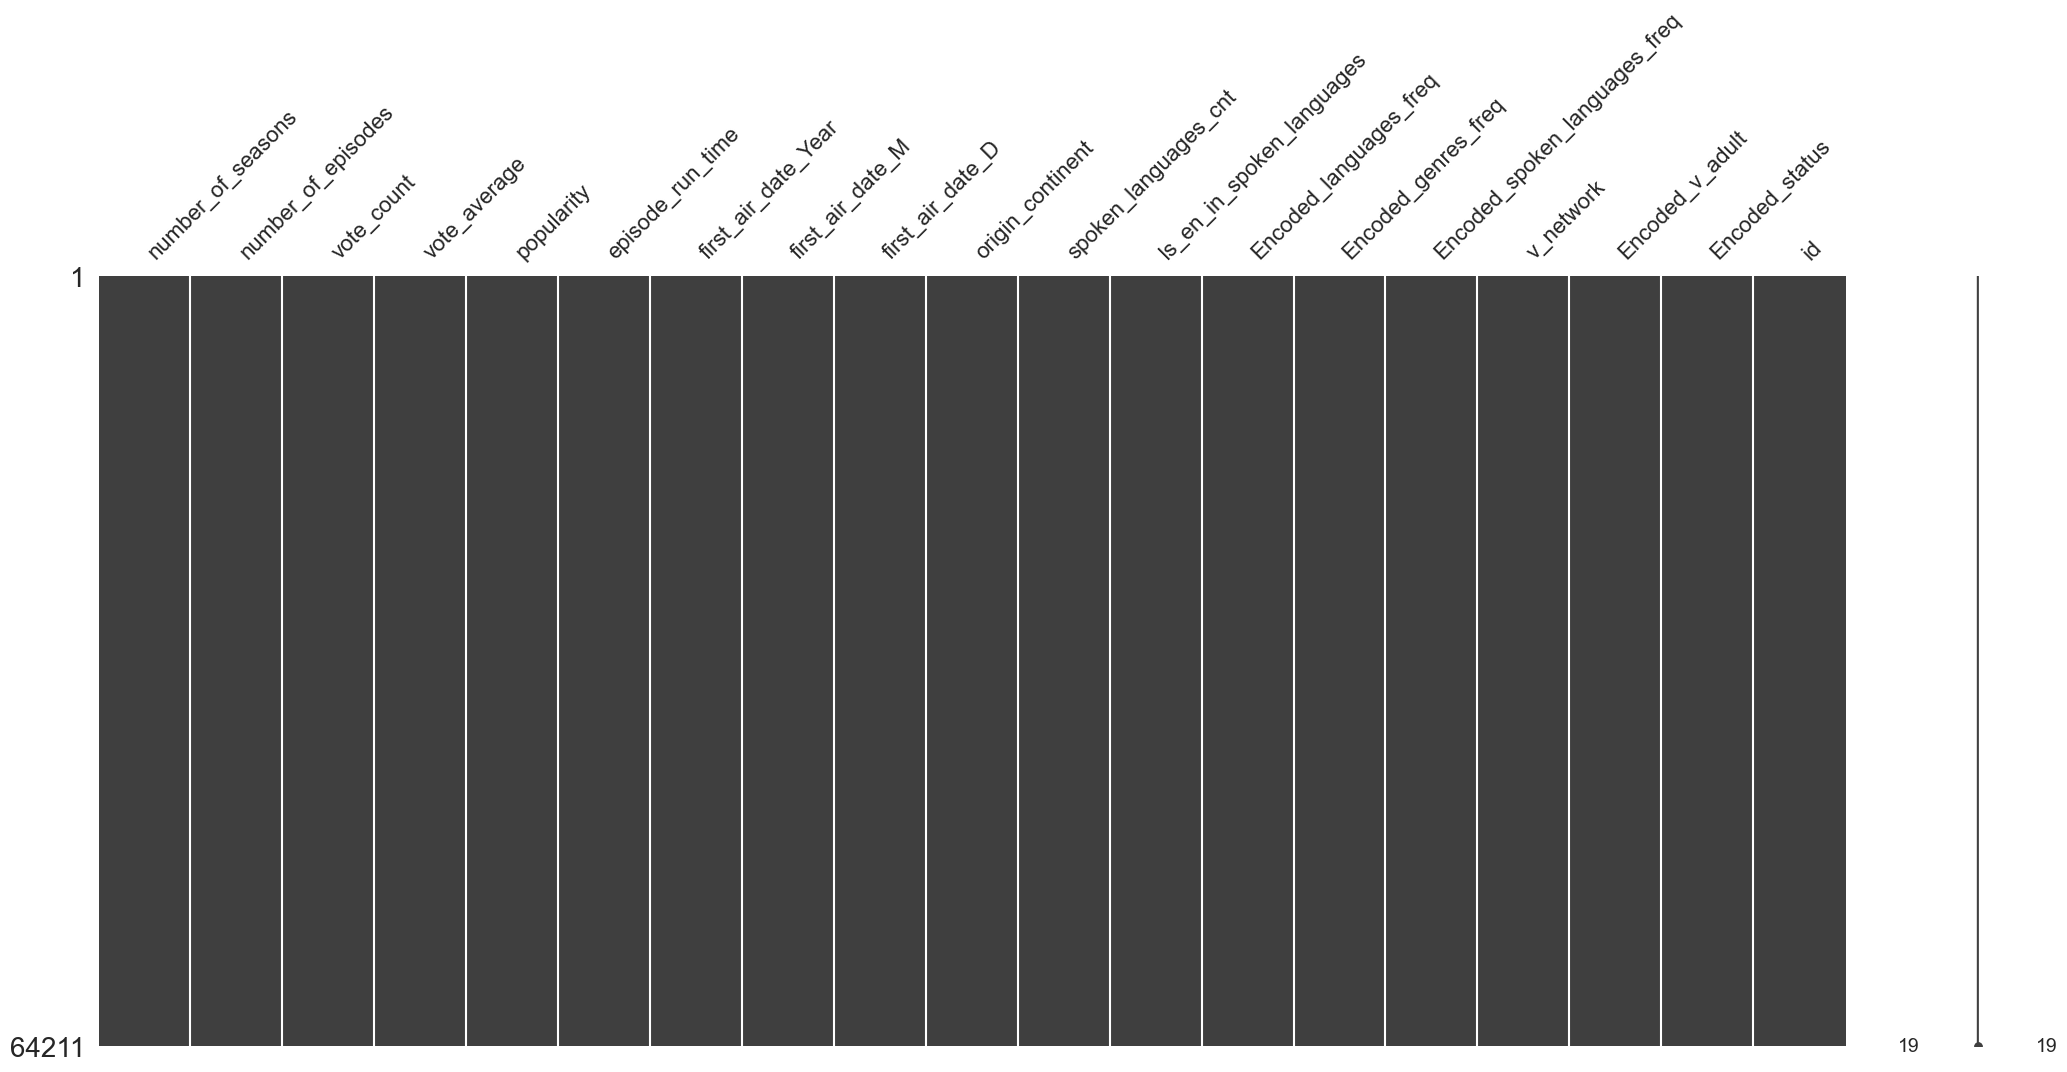

In [92]:
import missingno as msno
msno.matrix(df)   # based on whether data is missing (NaN) or present.

In [93]:
generate_csv_reports(df)

In [94]:
df= categorize_series(df)



In [95]:
df

number_of_seasons  number_of_episodes  vote_count  vote_average  \
1                       3                  41       17836             8   
2                       4                  34       16161             9   
4                       6                  93       13870             8   
5                       7                 137       13180             8   
6                       2                   9       13053             8   
...                   ...                 ...         ...           ...   
168630                  1                  32           0             0   
168633                  1                   8           0             0   
168634                  1                   1           0             0   
168636                  1                   1           0             0   
168638                  1                   5           0             0   

        popularity  episode_run_time  first_air_date_Year  first_air_date_M  \
1               96                70                 2017                 5   
2              186                 0                 2016                 7   
4              417                45                 2016                 1   
5              144                45                 2017                 1   
6              116                 0                 2021                 9   
...            ...               ...                  ...               ...   
168630           4                 0                 2023                11   
168633           3                 0                 2023                11   
168634           1                 0                 2023                 3   
168636           2                 0                 2023                11   
168638           2                 0                 2016                 1   

        first_air_date_D  origin_continent  ...  Is_en_in_spoken_languages  \
1                      2                 2  ...                      False   
2                     15                 3  ...                       True   
4                     25                 3  ...                       True   
5                     26                 3  ...                       True   
6                     17                 5  ...                       True   
...                  ...               ...  ...                        ...   
168630                20                 5  ...                      False   
168633                30                 2  ...                      False   
168634                 3                 5  ...                      False   
168636                30                 5  ...                      False   
168638                 1                 3  ...                       True   

       Encoded_languages_freq  Encoded_genres_freq  \
1                        3853                  985   
2                       38671                  110   
4                       38671                   14   
5                       38671                  409   
6                           1                   38   
...                       ...                  ...   
168630                   1421                16282   
168633                   6204                   25   
168634                  58589                68926   
168636                    199                 1037   
168638                  58589                68926   

        Encoded_spoken_languages_freq  v_network  Encoded_v_adult  \
1                                5178          2                0   
2                               73268          2                0   
4                               73268          2                0   
5                               73268          4                0   
6                                   1          2                0   
...                               ...        ...              ...   
168630                           1405          4                0   
168633              

In [96]:
columns_to_prefix = ['number_of_seasons', 'number_of_episodes']
prefix = 'cat_as_int_'

df = add_prefix_to_columns(df, columns_to_prefix, prefix)


In [97]:
# Define the static list of columns to be converted
columns_to_convert = [
    'cat_as_int_number_of_seasons',
    'cat_as_int_number_of_episodes',
    'vote_count',
    'vote_average',
    'popularity',
    'episode_run_time',
    'spoken_languages_cnt'
    
]

convert_columns_to_float64(df, columns_to_convert)
print(df.dtypes)  # Check the data types to verify conversion


# conclusion:
# drop columns: cat_as_int_number_of_seasons, cat_as_int_number_of_episodes,c_name,is_duplicate_except_last" 
# # Define the list of column names




cat_as_int_number_of_seasons      float64
cat_as_int_number_of_episodes     float64
vote_count                        float64
vote_average                      float64
popularity                        float64
episode_run_time                  float64
first_air_date_Year                 int64
first_air_date_M                    int64
first_air_date_D                    int64
origin_continent                     int8
spoken_languages_cnt              float64
Is_en_in_spoken_languages        category
Encoded_languages_freq              int64
Encoded_genres_freq                 int64
Encoded_spoken_languages_freq       int64
v_network                            int8
Encoded_v_adult                  category
Encoded_status                   category
id                                  int64
seasons_category                 category
episodes_category                category
dtype: object


In [98]:
# Drop the specified columns

columns_to_drop = [
    'cat_as_int_number_of_seasons',
    'cat_as_int_number_of_episodes'    
]

df = df.drop(columns=columns_to_drop)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64211 entries, 1 to 168638
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vote_count                     64211 non-null  float64 
 1   vote_average                   64211 non-null  float64 
 2   popularity                     64211 non-null  float64 
 3   episode_run_time               64211 non-null  float64 
 4   first_air_date_Year            64211 non-null  int64   
 5   first_air_date_M               64211 non-null  int64   
 6   first_air_date_D               64211 non-null  int64   
 7   origin_continent               64211 non-null  int8    
 8   spoken_languages_cnt           64211 non-null  float64 
 9   Is_en_in_spoken_languages      64211 non-null  category
 10  Encoded_languages_freq         64211 non-null  int64   
 11  Encoded_genres_freq            64211 non-null  int64   
 12  Encoded_spoken_languages_freq  

In [100]:
columns_list = get_numeric_columns(df)
print(columns_list)




['vote_count', 'vote_average', 'popularity', 'episode_run_time', 'first_air_date_Year', 'first_air_date_M', 'first_air_date_D', 'origin_continent', 'spoken_languages_cnt', 'Encoded_languages_freq', 'Encoded_genres_freq', 'Encoded_spoken_languages_freq', 'v_network', 'id']


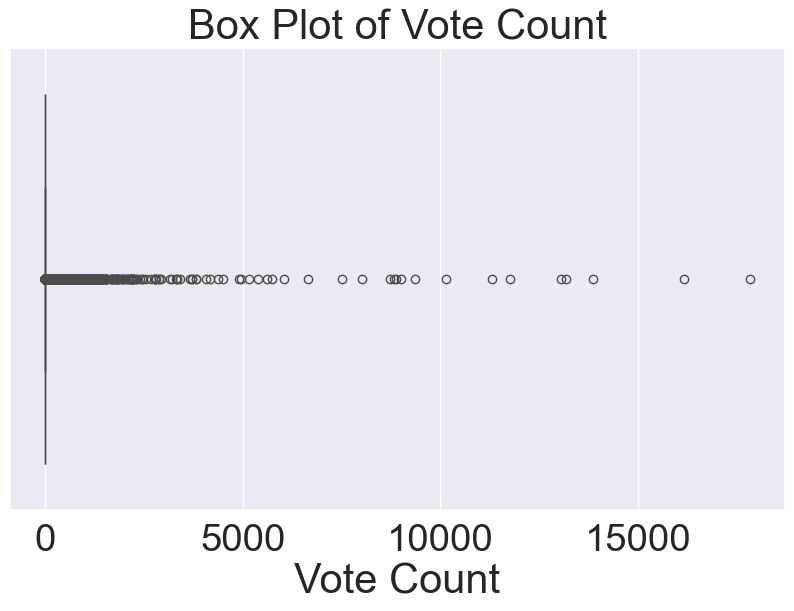

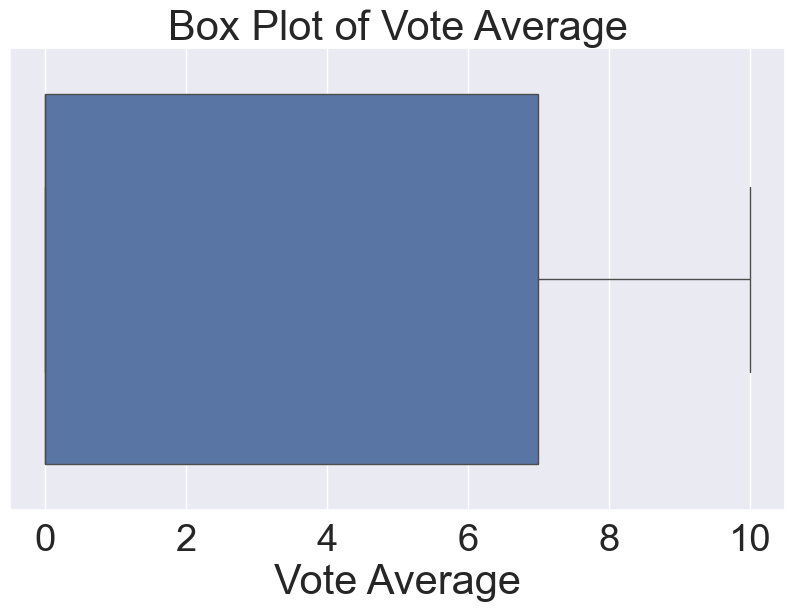

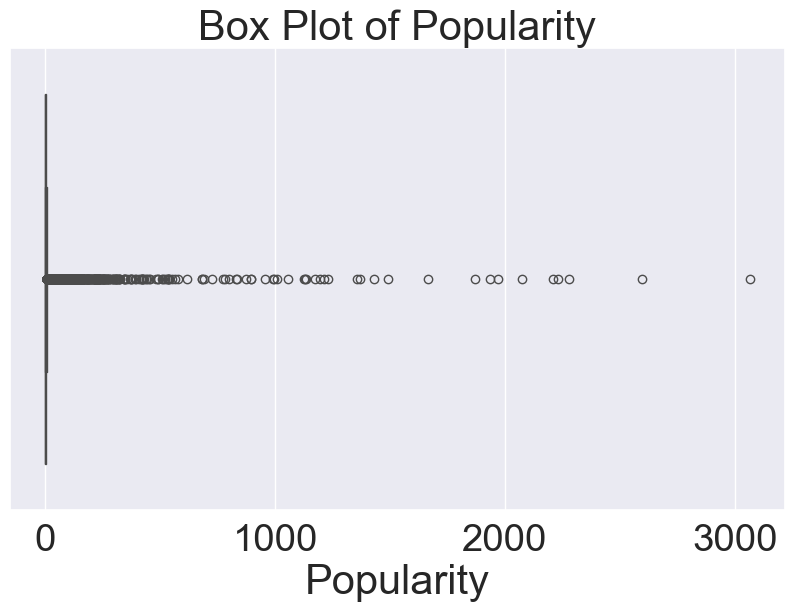

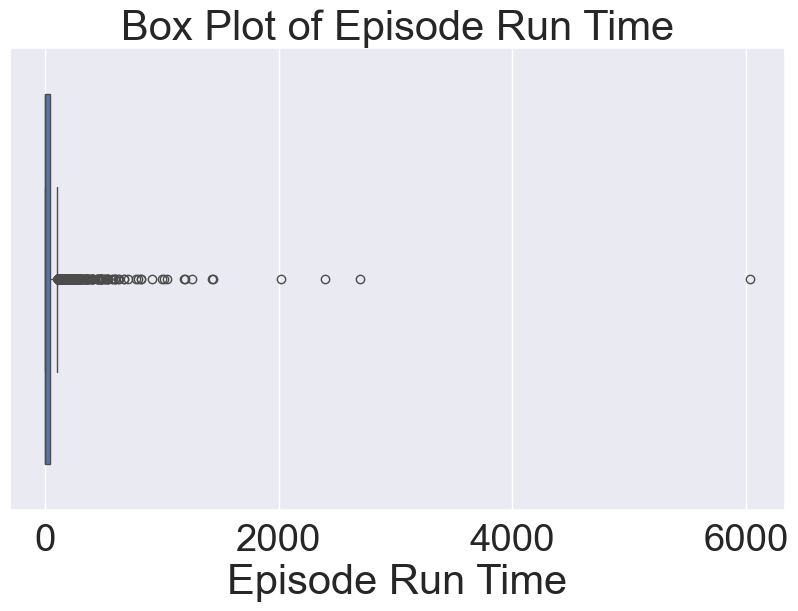

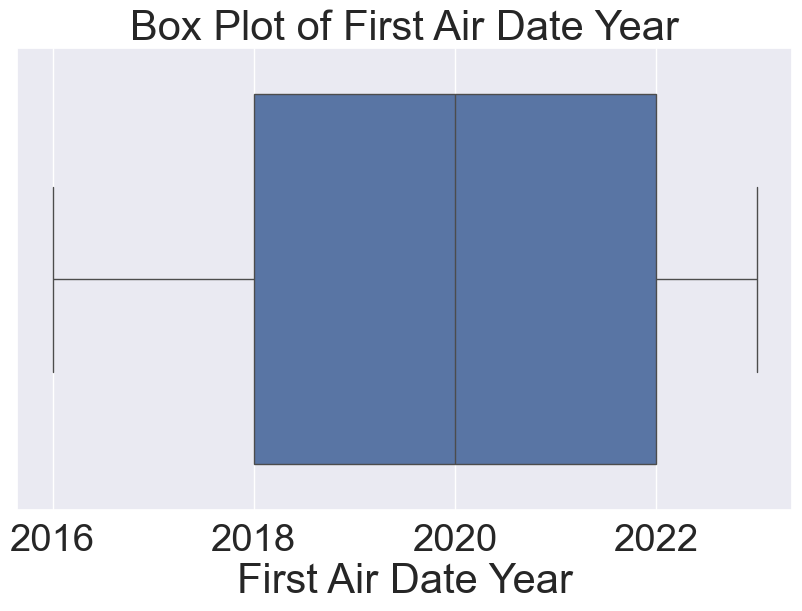

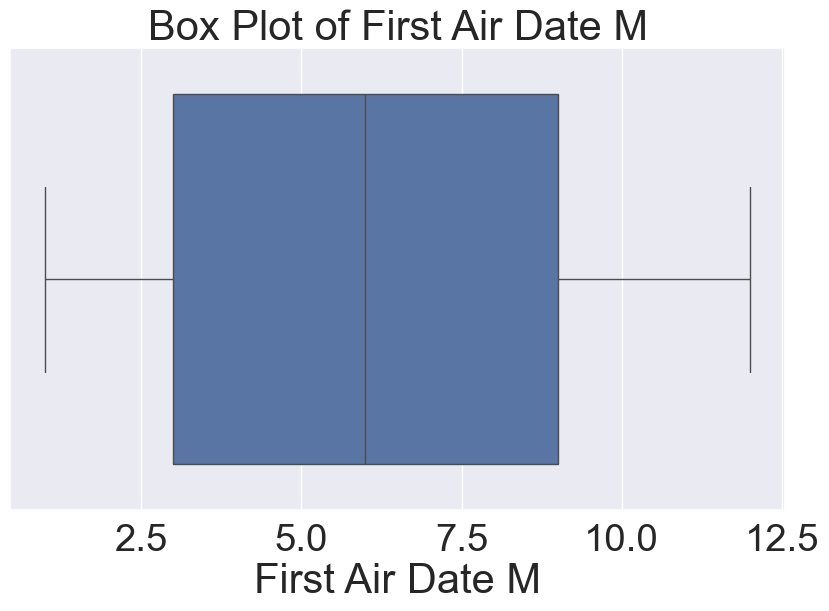

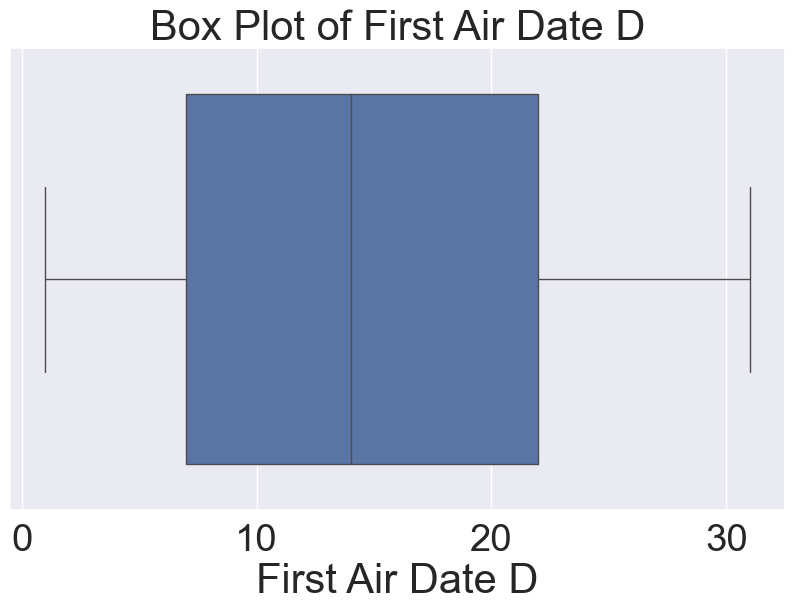

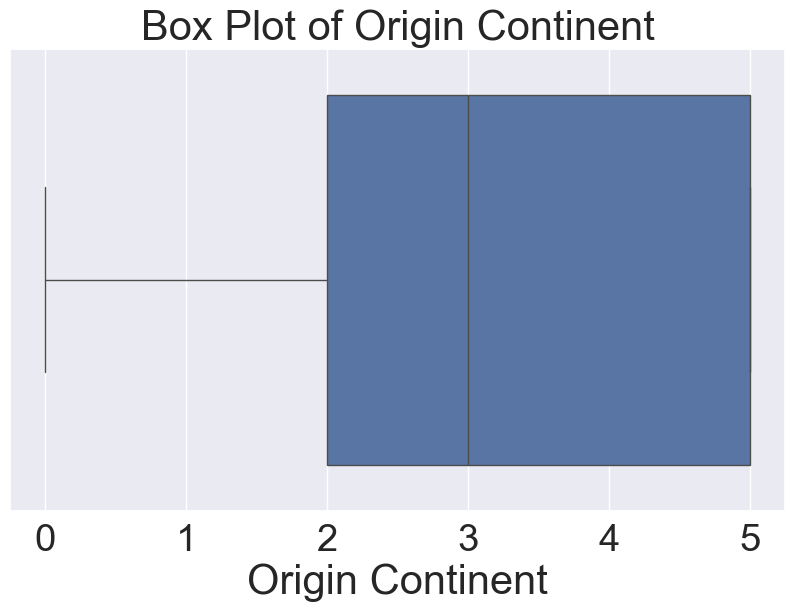

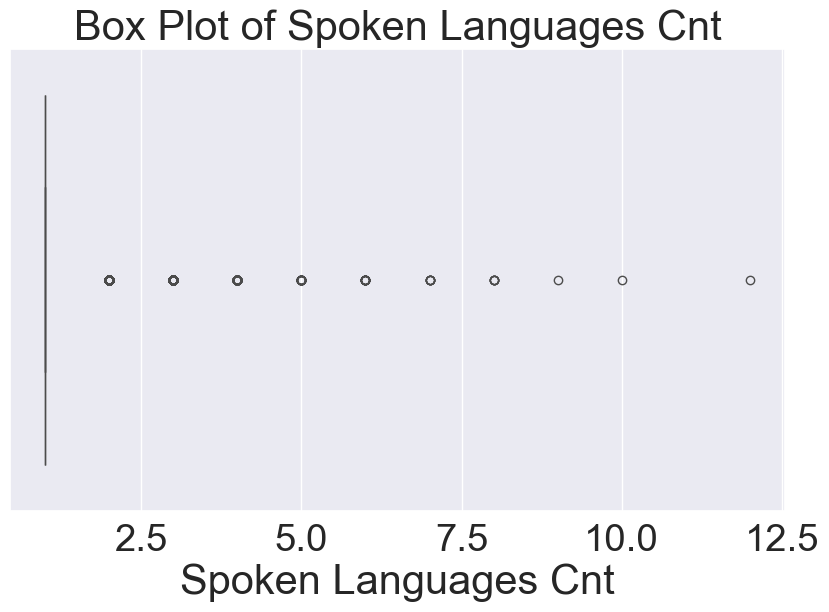

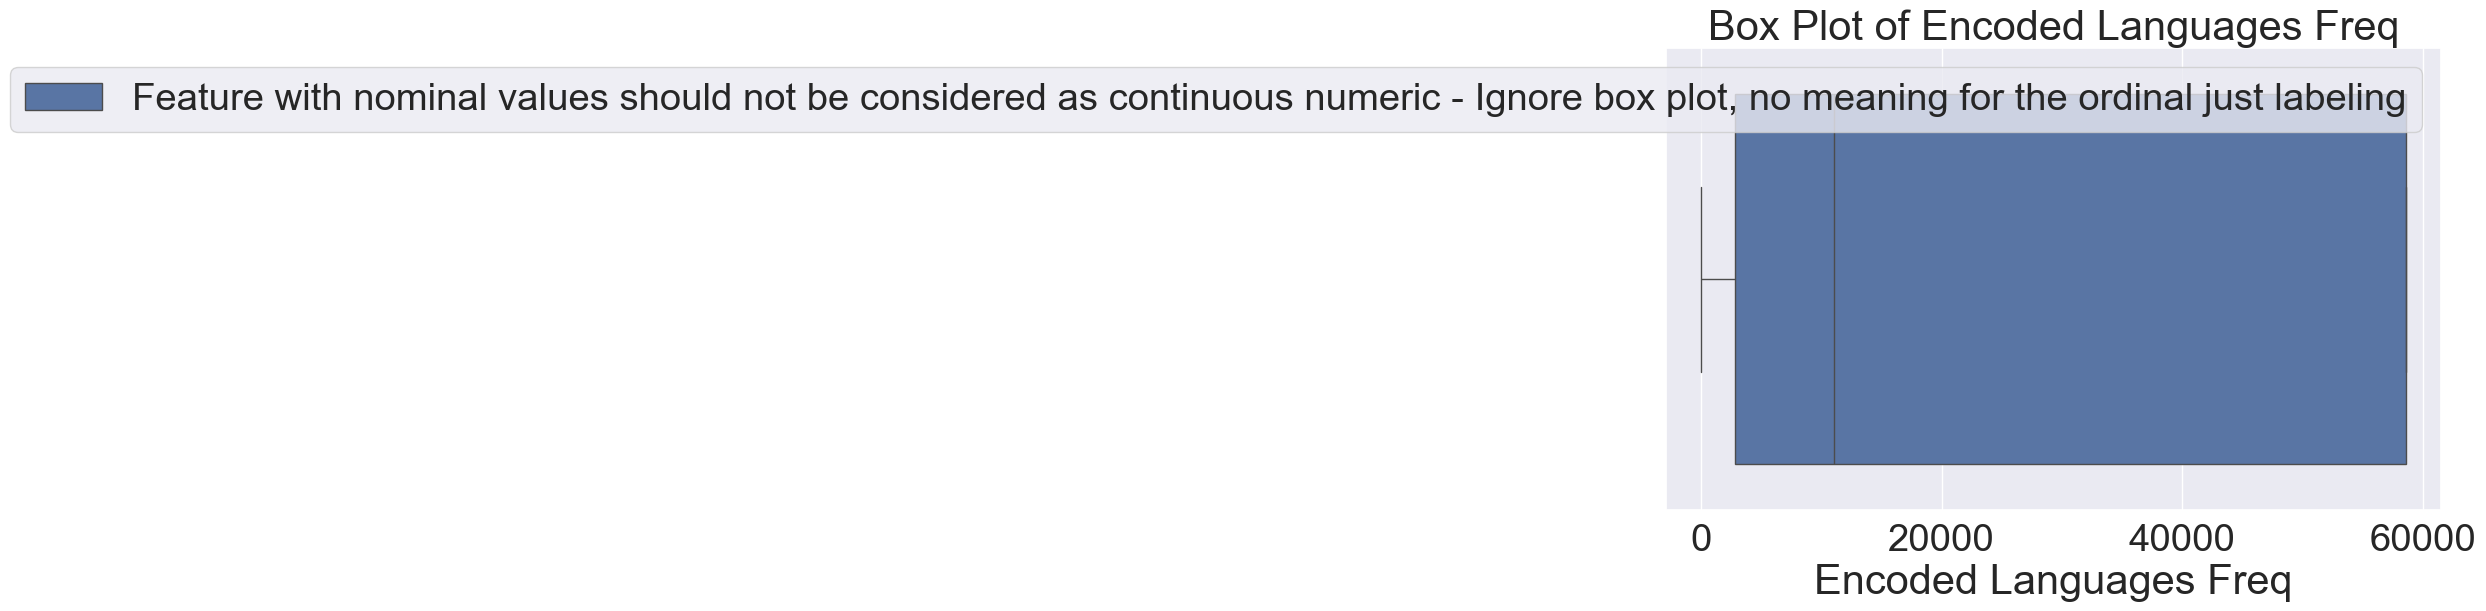

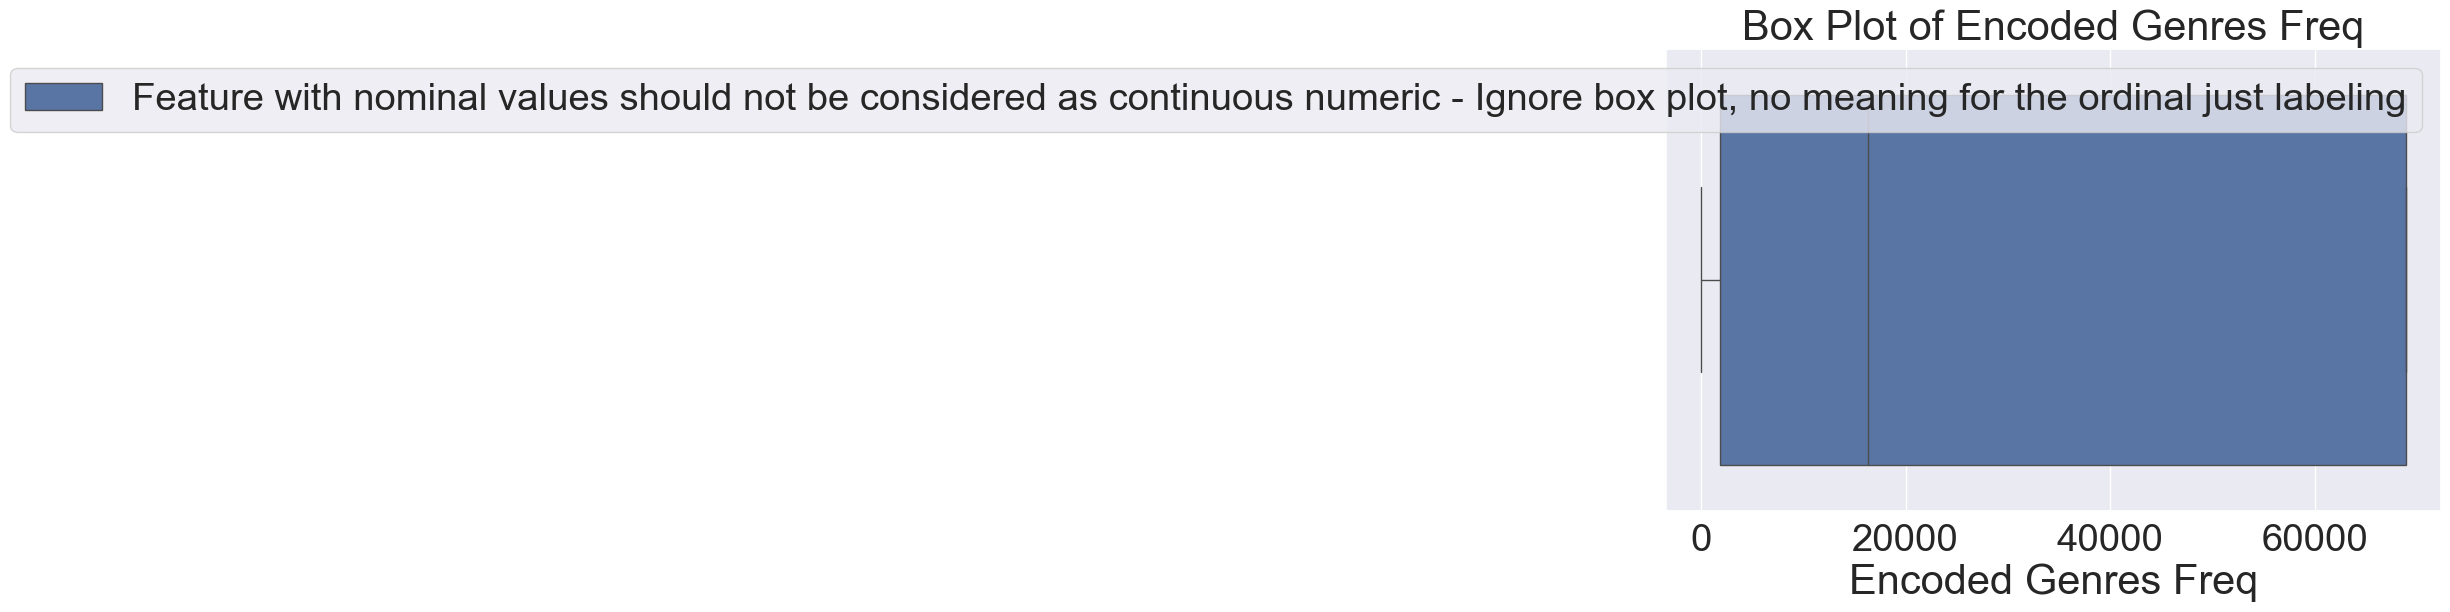

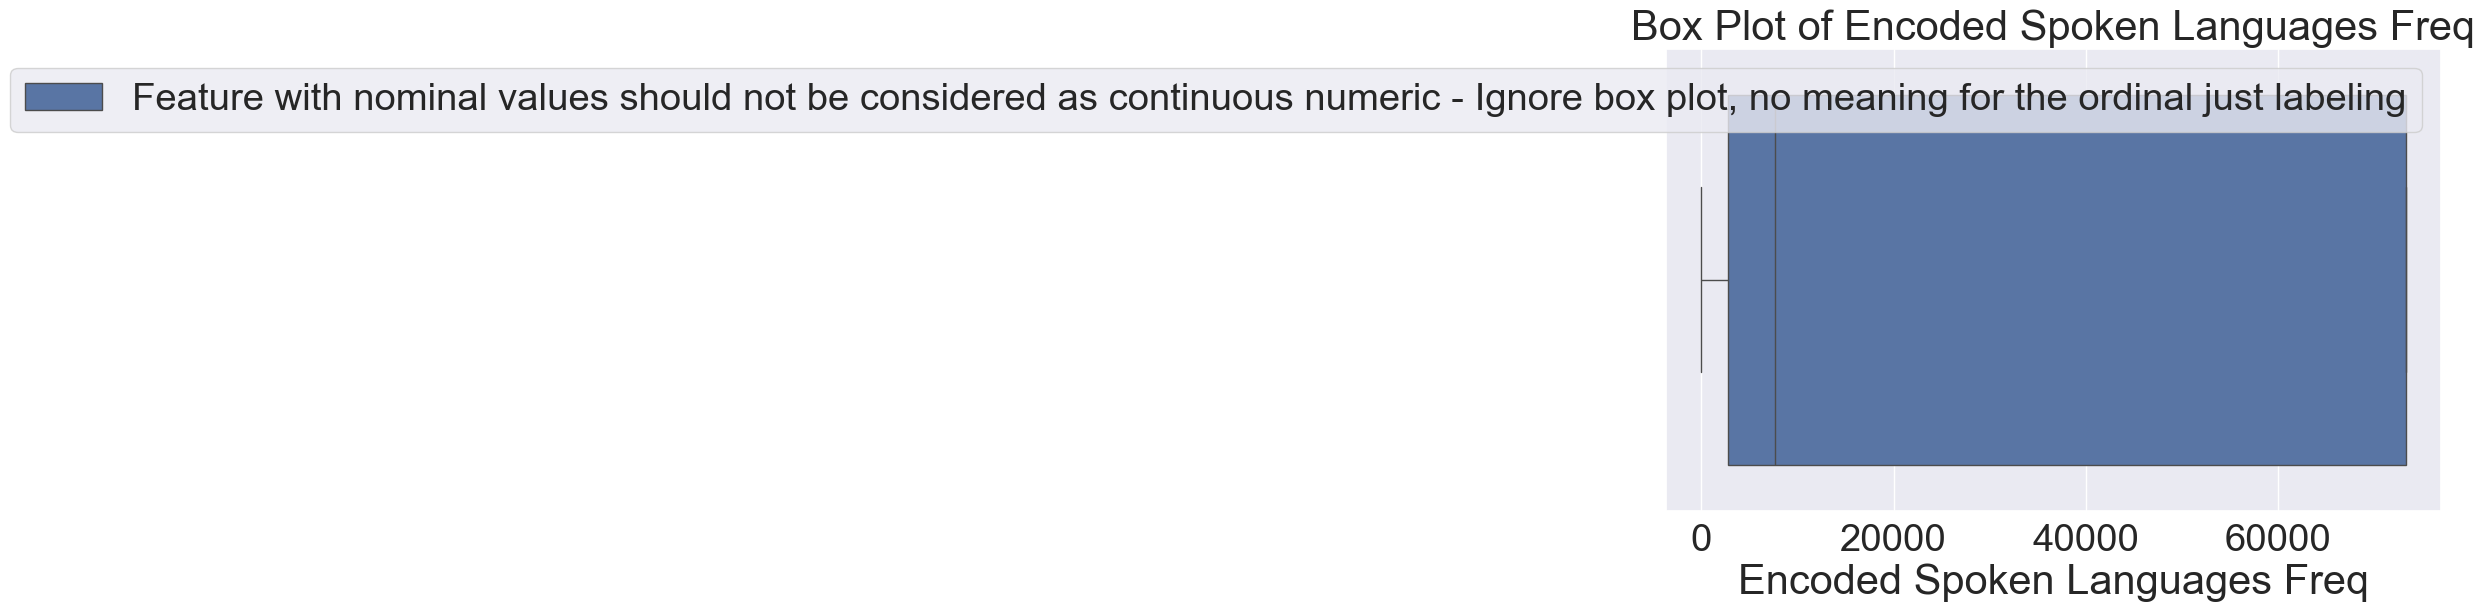

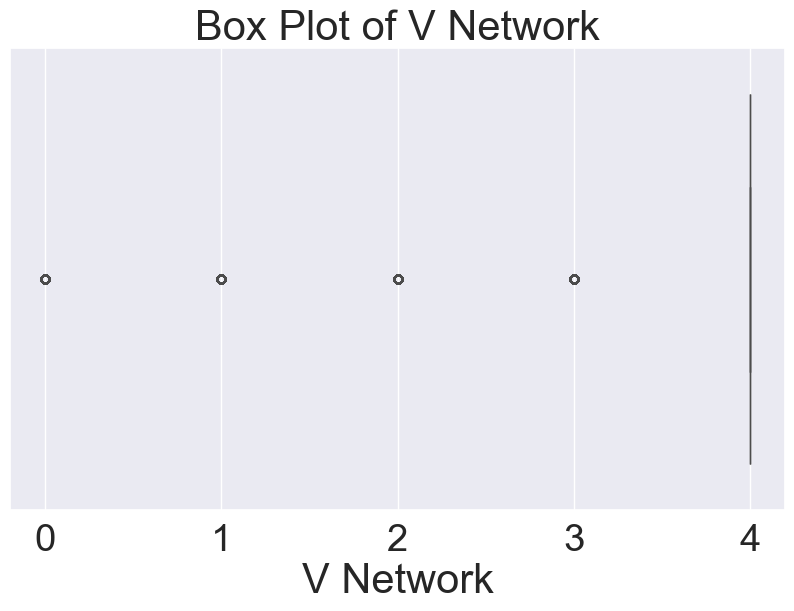

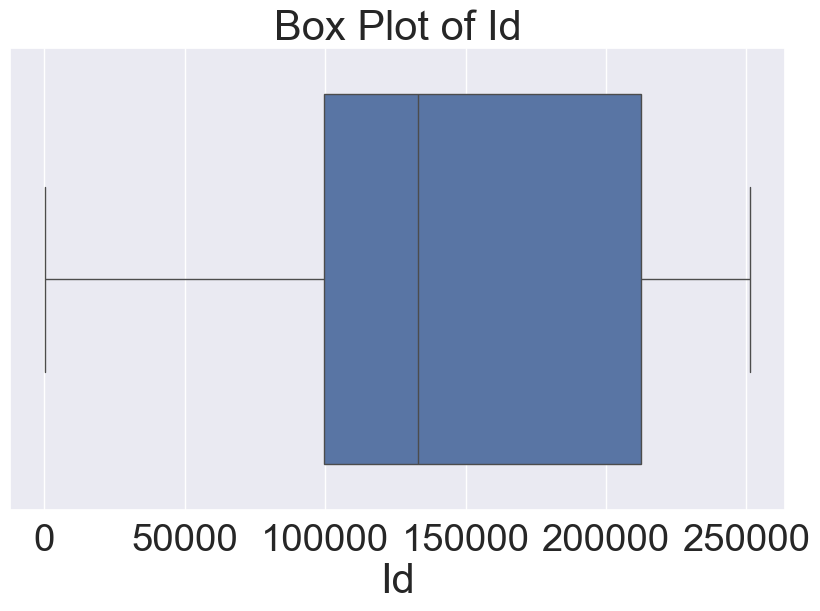

In [101]:
plot_boxplots(df, columns_list)

In [102]:
# Get shape of DataFrame
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (64211, 19)


In [103]:
# Get summary statistics for numerical columns
summary = df.describe()
summary

vote_count  vote_average    popularity  episode_run_time  \
count  64211.000000  64211.000000  64211.000000      64211.000000   
mean      16.113734      2.784647      5.388329         20.762299   
std      216.268825      3.638154     39.148729         44.673586   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      1.000000          0.000000   
50%        0.000000      0.000000      1.000000          0.000000   
75%        1.000000      7.000000      3.000000         42.000000   
max    17836.000000     10.000000   3065.000000       6032.000000   

       first_air_date_Year  first_air_date_M  first_air_date_D  \
count         64211.000000      64211.000000      64211.000000   
mean           2019.910109          6.341375         14.626513   
std               2.192514          3.503626          9.090619   
min            2016.000000          1.000000          1.000000   
25%            2018.000000          3.000000          7.000000   
50%            2020.000000          6.000000         14.000000   
75%            2022.000000          9.000000         22.000000   
max            2023.000000         12.000000         31.000000   

       origin_continent  spoken_languages_cnt  Encoded_languages_freq  \
count      64211.000000          64211.000000            64211.000000   
mean           3.464126              1.068804            25704.866222   
std            1.495891              0.327241            24204.984688   
min            0.000000              1.000000                1.000000   
25%            2.000000              1.000000             2789.000000   
50%            3.000000              1.000000            11051.000000   
75%            5.000000              1.000000            58589.000000   
max            5.000000             12.000000            58589.000000   

       Encoded_genres_freq  Encoded_spoken_languages_freq     v_network  \
count         64211.000000                   64211.000000  64211.000000   
mean          28027.490274                   25274.094548      3.537743   
std           29146.997833                   30421.846124      1.031925   
min               1.000000                       1.000000      0.000000   
25%            1872.000000                    2771.000000      4.000000   
50%           16282.000000                    7660.000000      4.000000   
75%           68926.000000                   73268.000000      4.000000   
max           68926.000000                   73268.000000      4.000000   

                  id  
count   64211.000000  
mean   150742.465232  
std     58328.697310  
min       344.000000  
25%     99692.500000  
50%    133086.000000  
75%    212583.500000  
max    251181.000000

In [104]:
# Get summary statistics for the 'popularity' column
popularity_stats = df['popularity'].describe()
print(popularity_stats)




count    64211.000000
mean         5.388329
std         39.148729
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3065.000000
Name: popularity, dtype: float64


<Axes: >

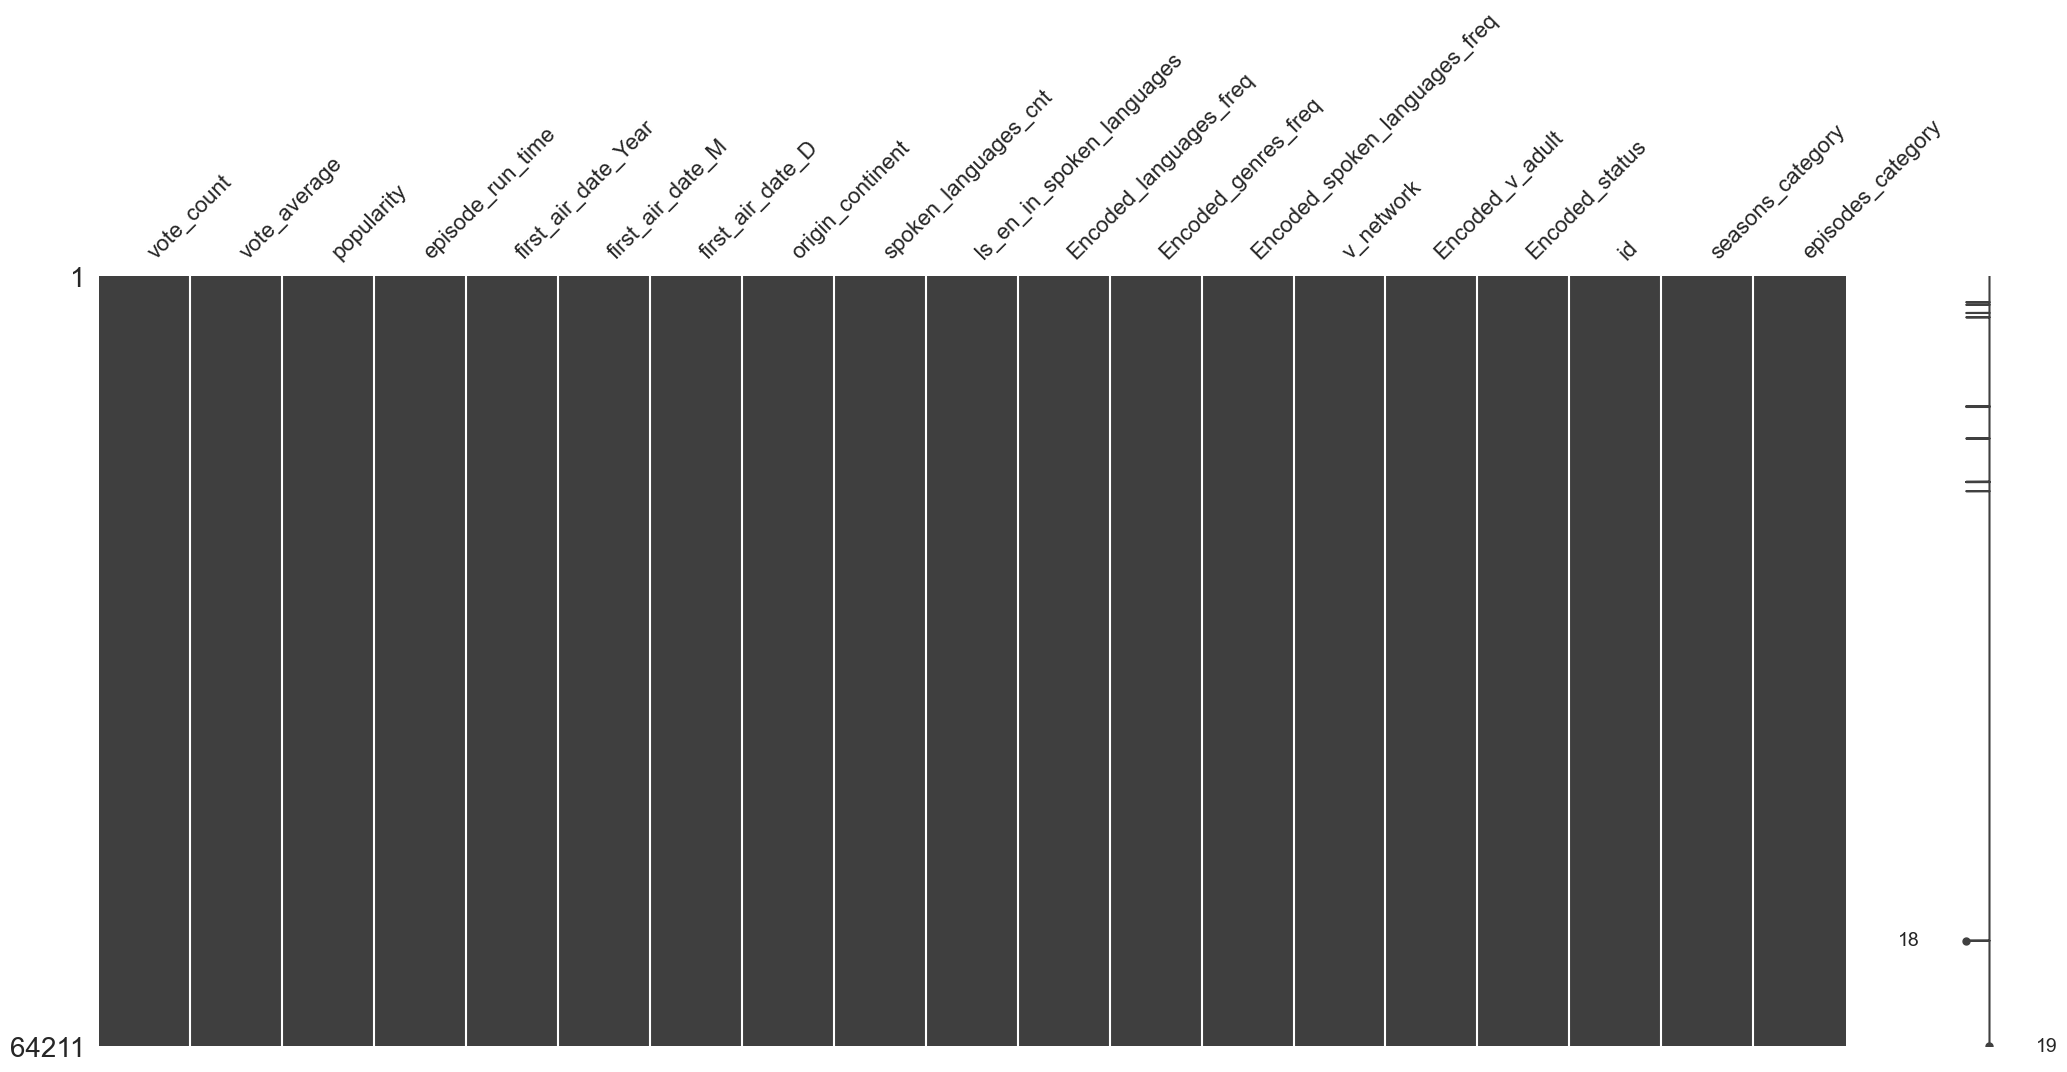

In [105]:
import missingno as msno
msno.matrix(df)   # based on whether data is missing (NaN) or present.

In [106]:
# Explanation of the Histogram
# Bins: Number of bins (e.g., 50) helps to categorize the popularity values into intervals.
# Log Scale: Using a log scale on the x-axis helps to visualize data with a wide range, making it easier to see patterns even when there are extreme values.
# Observations
# Skewness: The high mean and large standard deviation relative to the median suggest that the distribution is right-skewed. Most values are clustered around the lower end, with a few extremely high values.
# Outliers: The large maximum value (3065) compared to the 75th percentile (3) indicates the presence of extreme outliers.
# By visualizing the popularity data with a histogram, especially using a log scale for the x-axis, you can get a clearer picture of how popularity is distributed and identify patterns such as skewness and outliers.








In [107]:
print(df.columns)

Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time',
       'first_air_date_Year', 'first_air_date_M', 'first_air_date_D',
       'origin_continent', 'spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'v_network', 'Encoded_v_adult',
       'Encoded_status', 'id', 'seasons_category', 'episodes_category'],
      dtype='object')


In [108]:
# # The total number of subplots you are creating is determined by the product of the number of rows (a) and columns (b).
# Ensure that a * b is greater than or equal to the number of columns in your DataFrame. If not, you'll need to adjust a, b, or handle cases where you run out of subplot slots.
# Subplot Index (c):

# The c variable represents the subplot index. Ensure that it does not exceed a * b to avoid errors.
# The index c should start from 1 and increment correctly for each subplot to avoid overlapping or missing subplots.

In [109]:
# Bug in it later  ...

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # stuck 
# # Retrieve the first n=5 rows
# partial_df = df.head(len(df))

# # Calculate number of "rows and columns
# num_plots = len(partial_df.columns)
# a = 6  # Number of rows
# b = (num_plots + a - 1) // a  # Number of columns needed to fit all plots

# # Initialize plot counter
# c = 1

# fig = plt.figure(figsize=(30, 20))
# plt.subplots_adjust(hspace=0.5)
# sns.set(font_scale=2.5)

# for i in partial_df.columns:  # Iterate over column names
#     plt.subplot(a, b, c)
#     plt.title('{}'.format(i))
#     plt.xlabel(i)
#     sns.countplot(x=partial_df[i], palette=['mediumslateblue', 'cyan'])
#     c += 1

# fig.tight_layout()
# plt.show()


In [110]:
cat_df = get_categorical_df(df)

cat_df

Is_en_in_spoken_languages Encoded_v_adult Encoded_status  \
1                          False               0              0   
2                           True               0              1   
4                           True               0              0   
5                           True               0              0   
6                           True               0              1   
...                          ...             ...            ...   
168630                     False               0              1   
168633                     False               0              1   
168634                     False               0              1   
168636                     False               0              1   
168638                      True               0              1   

       seasons_category episodes_category  
1                  3-10             10-50  
2                  3-10             10-50  
4                  3-10            50-100  
5                  3-10           100-500  
6                   1-3              0-10  
...                 ...               ...  
168630              1-3             10-50  
168633              1-3              0-10  
168634              1-3              0-10  
168636              1-3              0-10  
168638              1-3              0-10  

[64211 rows x 5 columns]

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


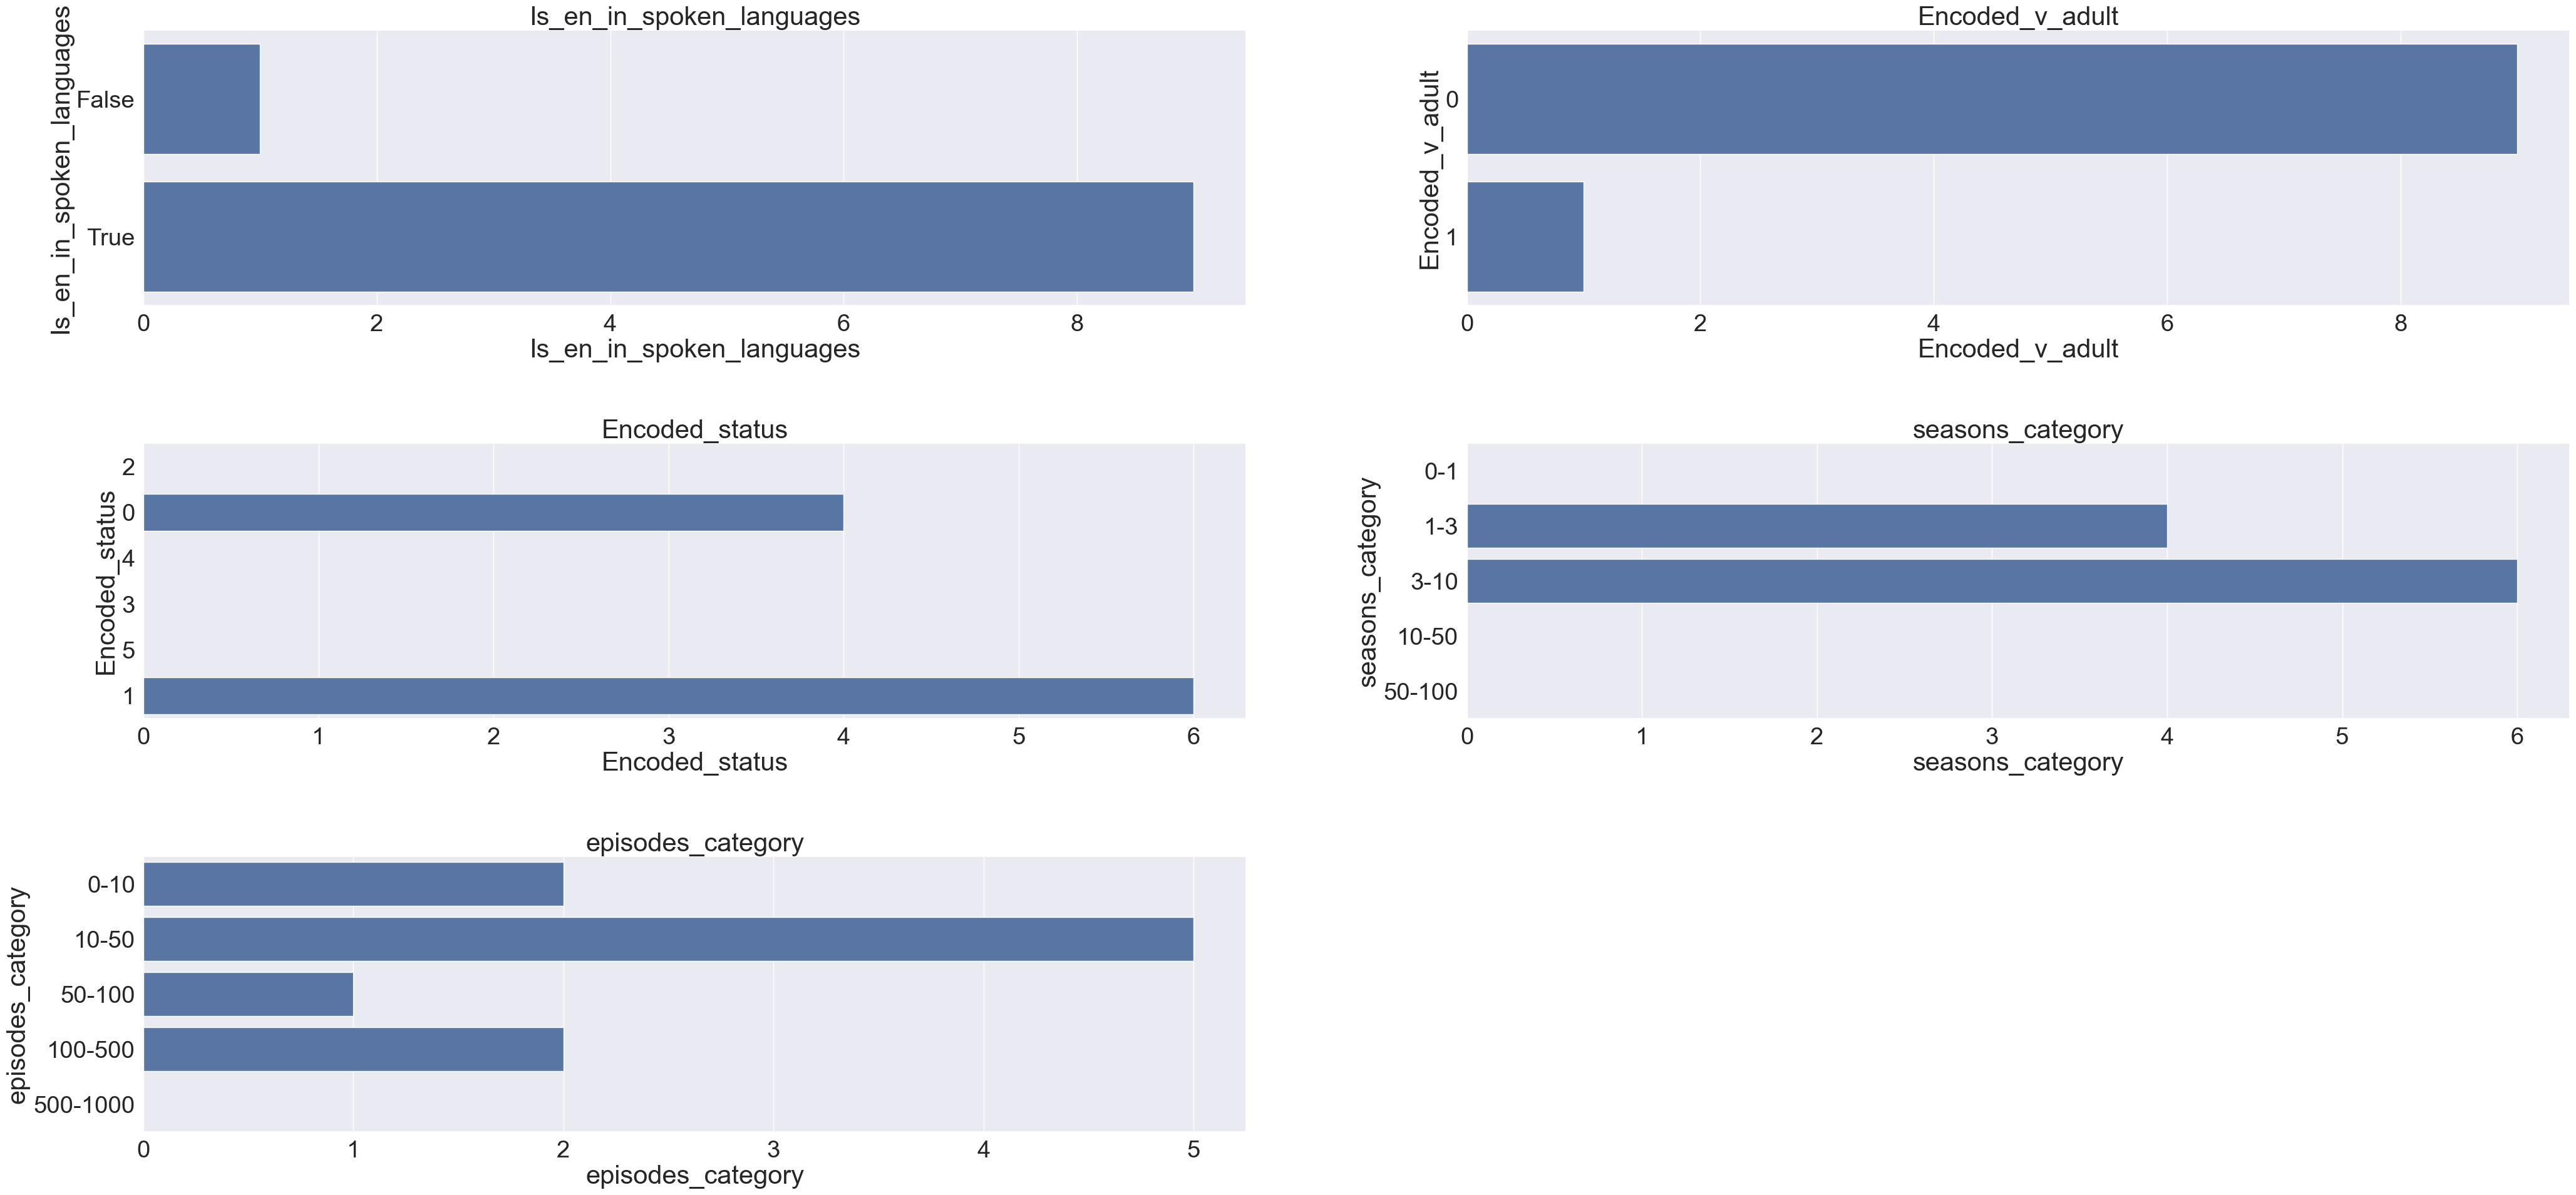

In [111]:
# stuck took a lot of time check later or user data prep

a = 5  # number of rows
b = 2  # number of columns
c = 1  # plot counter


# Retrieve the first n=10 rows
cat_df = cat_df.head(10)

fig = plt.figure(figsize=(50,40))
plt.subplots_adjust(hspace = 0.5)
sb.set(font_scale = 2.5)
# plot cat_df columns
for i in cat_df:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sb.countplot(cat_df[i])
        c = c + 1

plt.show()

In [112]:
# cols= ['age','fare']
# con_df = df[cols]

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='popularity', ylabel='count'>

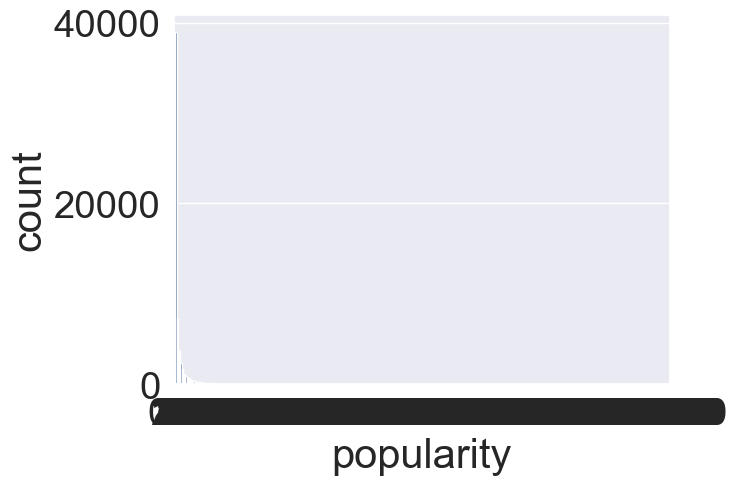

In [113]:
#Target Value is a Dummy Value for categorial data here popoplarity is continues number - not fit use histogram
sb.countplot(x='popularity', data=df)

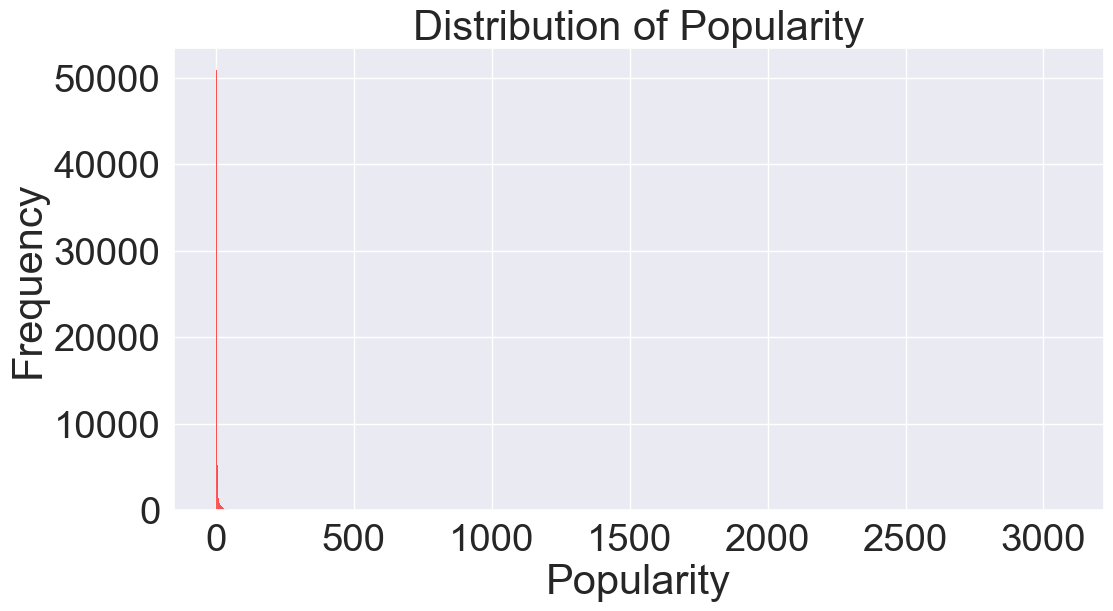

In [114]:
plot_popularity_histogram(df)

<Axes: >

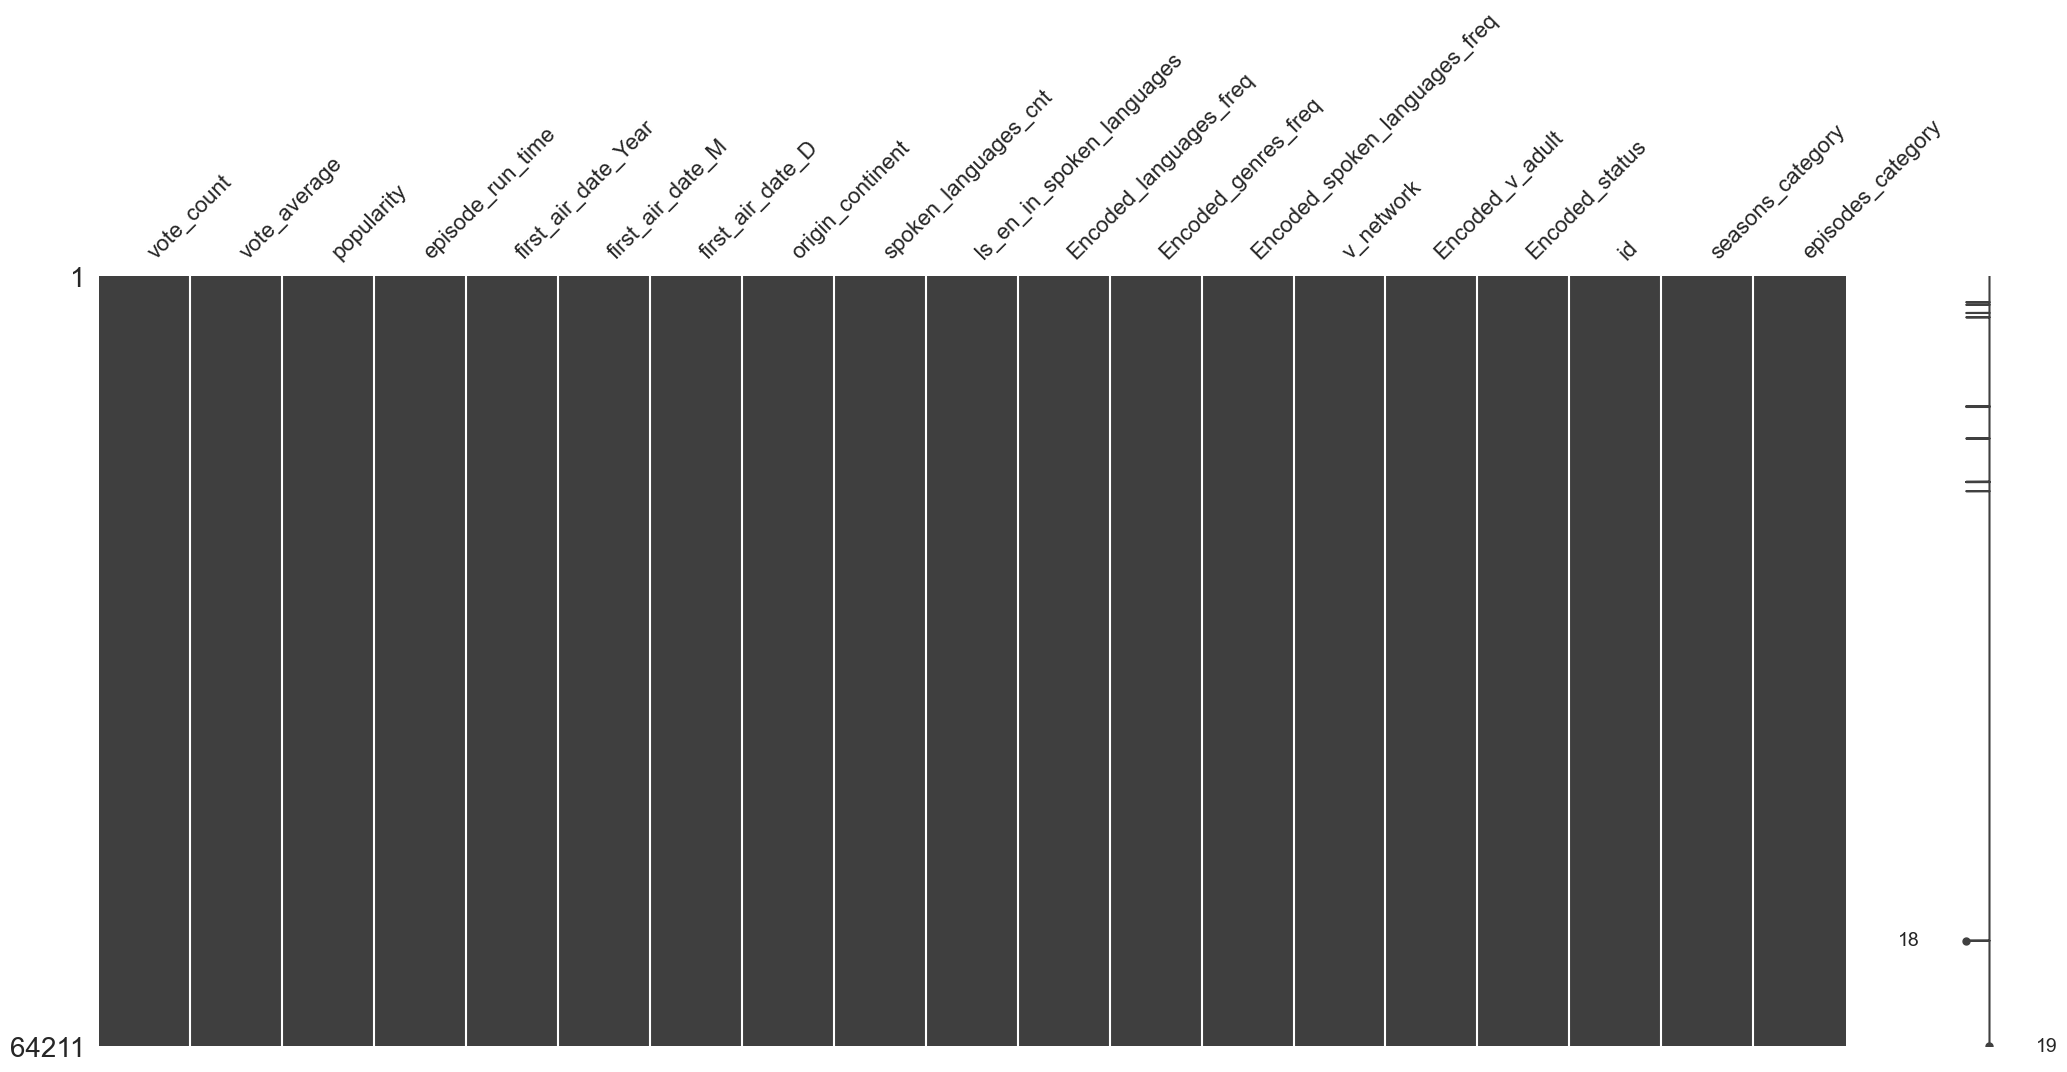

In [115]:
import missingno as msno
msno.matrix(df)   # based on whether data is missing (NaN) or present.

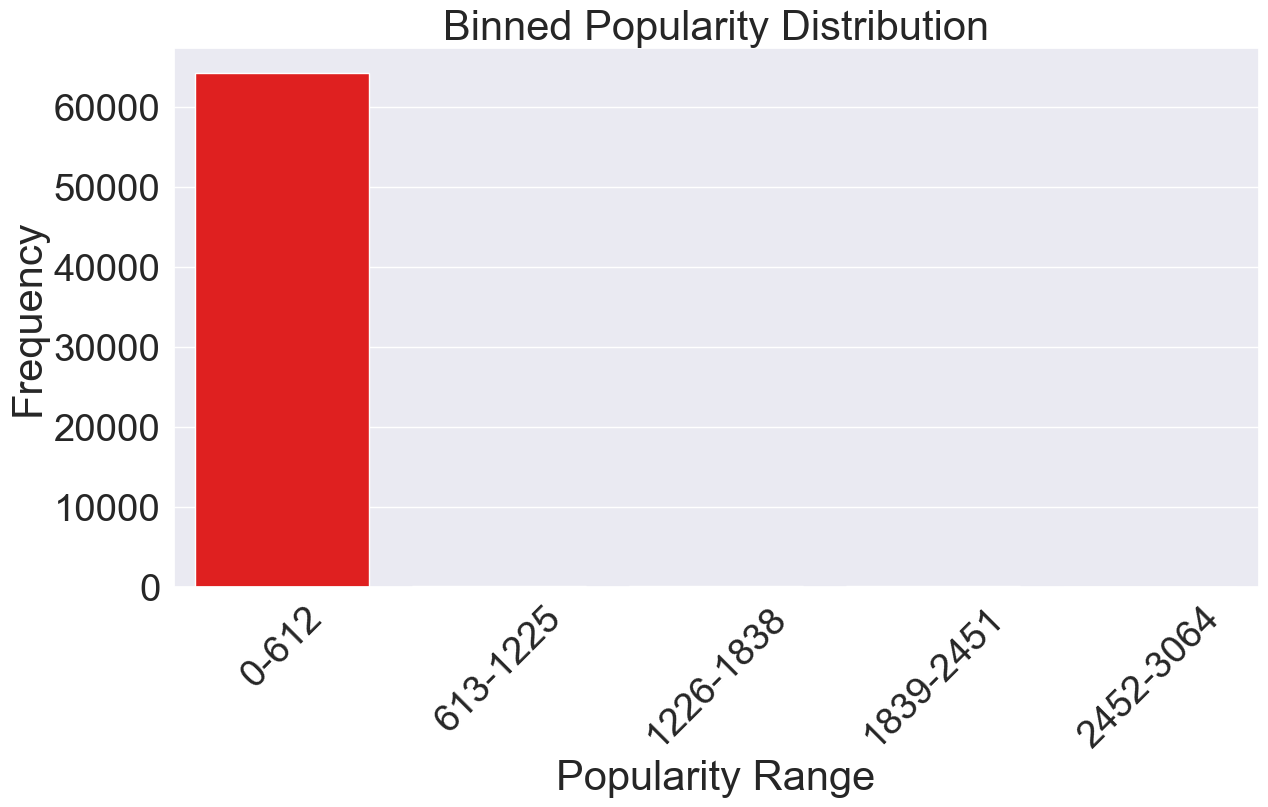

NaN values found in 'popularity_binned':
      popularity popularity_binned
3035      3065.0               NaN


In [116]:
plot_binned_popularity(df)


<Axes: >

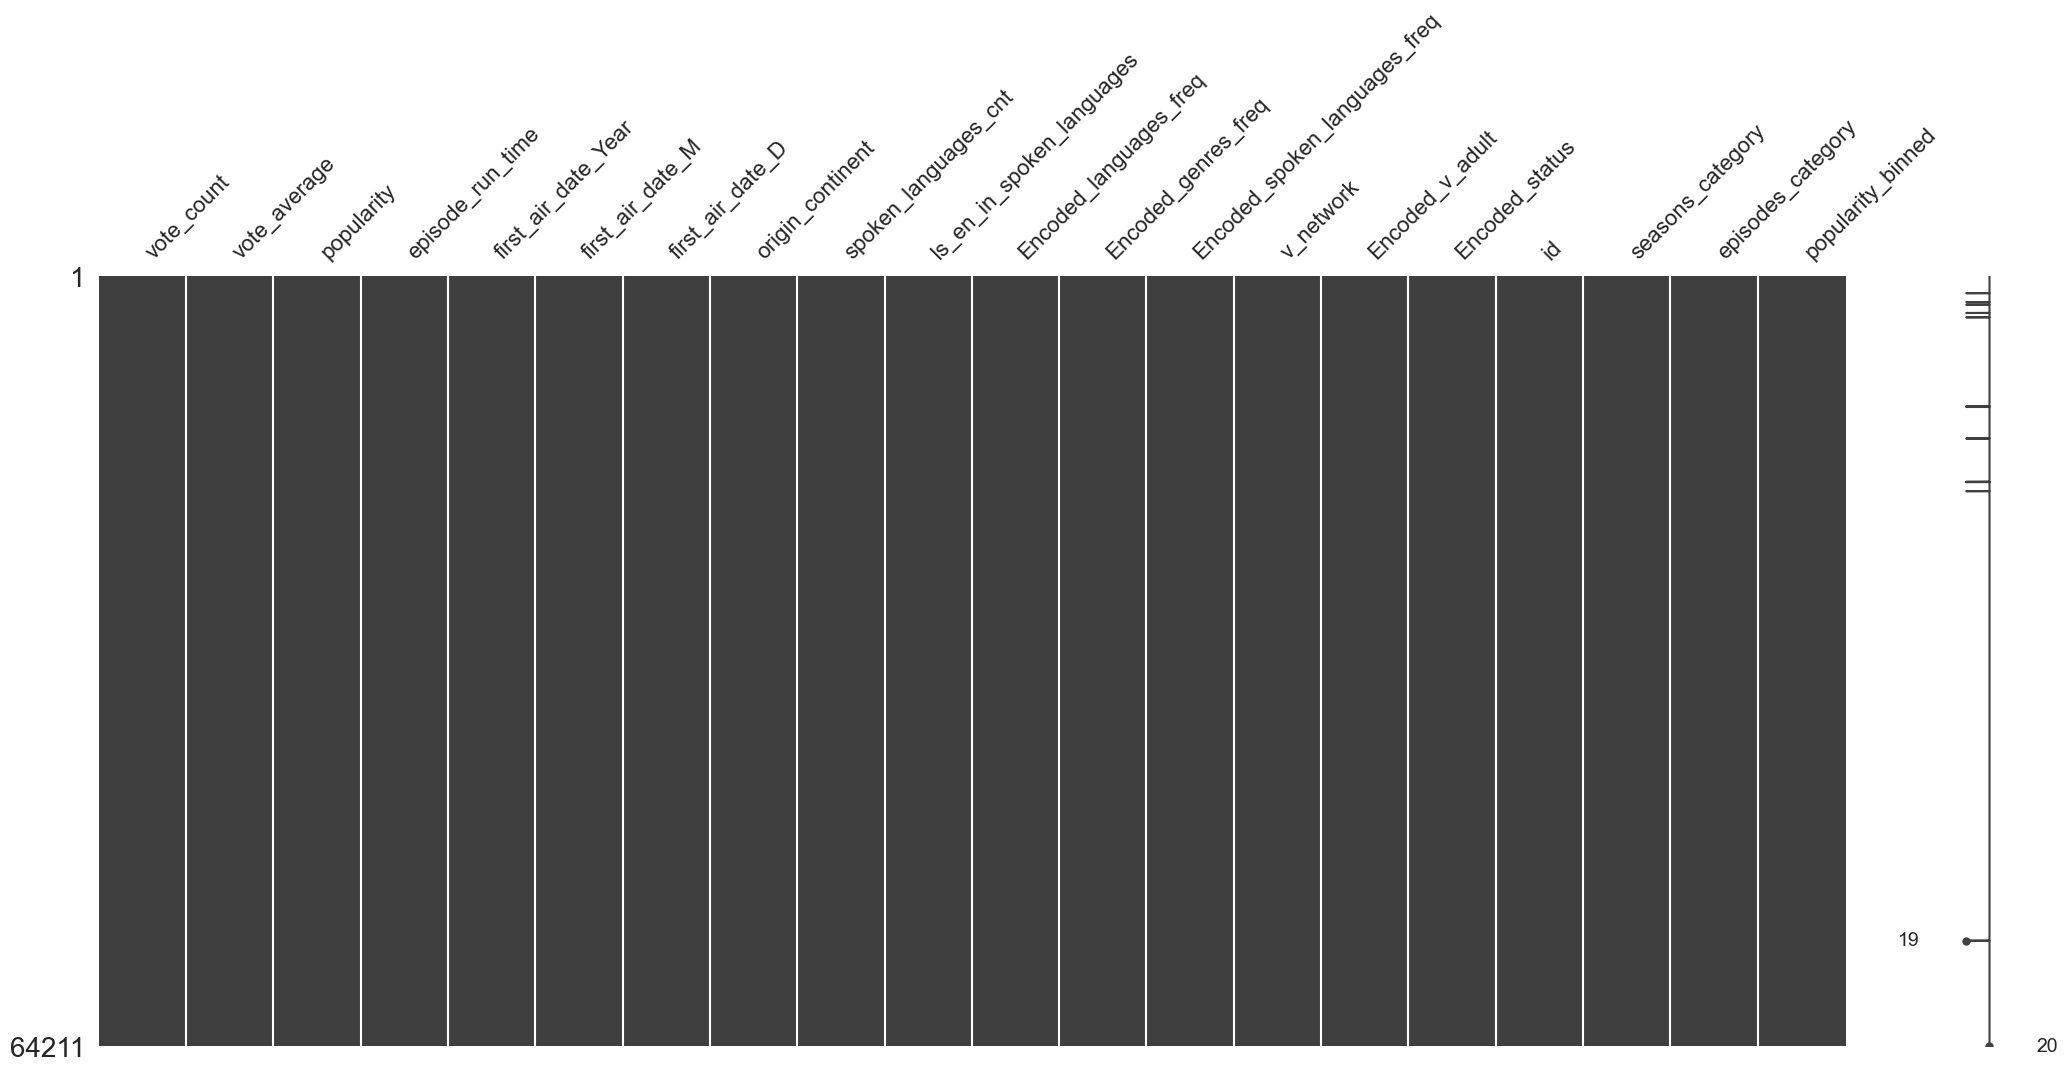

In [117]:
import missingno as msno
msno.matrix(df)   # based on whether data is missing (NaN) or present.

In [118]:
df.corr()

vote_count  vote_average  popularity  \
vote_count                       1.000000      0.102688    0.159274   
vote_average                     0.102688      1.000000    0.100798   
popularity                       0.159274      0.100798    1.000000   
episode_run_time                 0.024216      0.181981    0.019380   
first_air_date_Year             -0.027114     -0.064596    0.016958   
first_air_date_M                -0.002203     -0.024615    0.004364   
first_air_date_D                 0.003516      0.010649    0.005107   
origin_continent                -0.010456     -0.066210   -0.019149   
spoken_languages_cnt             0.023823      0.086132    0.014398   
Encoded_languages_freq          -0.003328     -0.240916   -0.037889   
Encoded_genres_freq             -0.062604     -0.375580   -0.074516   
Encoded_spoken_languages_freq    0.048459      0.022191    0.010497   
v_network                       -0.086370     -0.206805   -0.058667   
id                              -0.074533     -0.279268   -0.021933   

                               episode_run_time  first_air_date_Year  \
vote_count                             0.024216            -0.027114   
vote_average                           0.181981            -0.064596   
popularity                             0.019380             0.016958   
episode_run_time                       1.000000            -0.068472   
first_air_date_Year                   -0.068472             1.000000   
first_air_date_M                      -0.004477            -0.021045   
first_air_date_D                       0.015036             0.031257   
origin_continent                      -0.060093            -0.081964   
spoken_languages_cnt                   0.050986            -0.019077   
Encoded_languages_freq                -0.185223             0.007846   
Encoded_genres_freq                   -0.193508             0.028635   
Encoded_spoken_languages_freq         -0.031613            -0.056945   
v_network                             -0.085670             0.030438   
id                                    -0.160462             0.624786   

                               first_air_date_M  first_air_date_D  \
vote_count                            -0.002203          0.003516   
vote_average                          -0.024615          0.010649   
popularity                             0.004364          0.005107   
episode_run_time                      -0.004477          0.015036   
first_air_date_Year                   -0.021045          0.031257   
first_air_date_M                       1.000000          0.057961   
first_air_date_D                       0.057961          1.000000   
origin_continent                       0.006188         -0.014578   
spoken_languages_cnt                   0.006124          0.004346   
Encoded_languages_freq                -0.015505         -0.042335   
Encoded_genres_freq                    0.006142         -0.020626   
Encoded_spoken_languages_freq         -0.024818         -0.010836   
v_network                             -0.007962          0.004977   
id                                     0.053634          0.009341   

                               origin_continent  spoken_languages_cnt  \
vote_count                            -0.010456              0.023823   
vote_average                          -0.066210              0.086132   
popularity                            -0.019149              0.014398   
episode_run_time                      -0.060093              0.050986   
first_air_date_Year                   -0.081964             -0.019077   
first_air_date_M                       0.006188              0.006124   
first_air_date_D                      -0.014578              0.004346   
origin_continent                       1.000000             -0.065396   
spoken_languages_cnt                  -0.065396              1.000000   
Encoded_languages_freq                 0.185352             -0.210137   
Encoded_genres_freq                    0.1861

<Axes: >

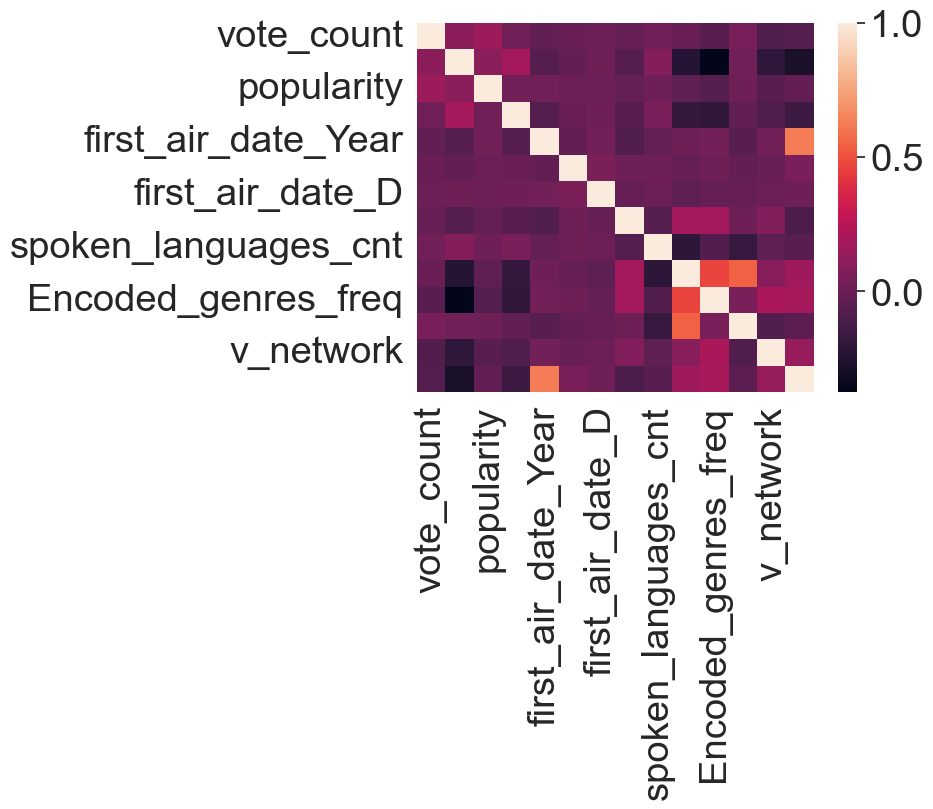

In [119]:
sb.heatmap(df.corr())

<Axes: >

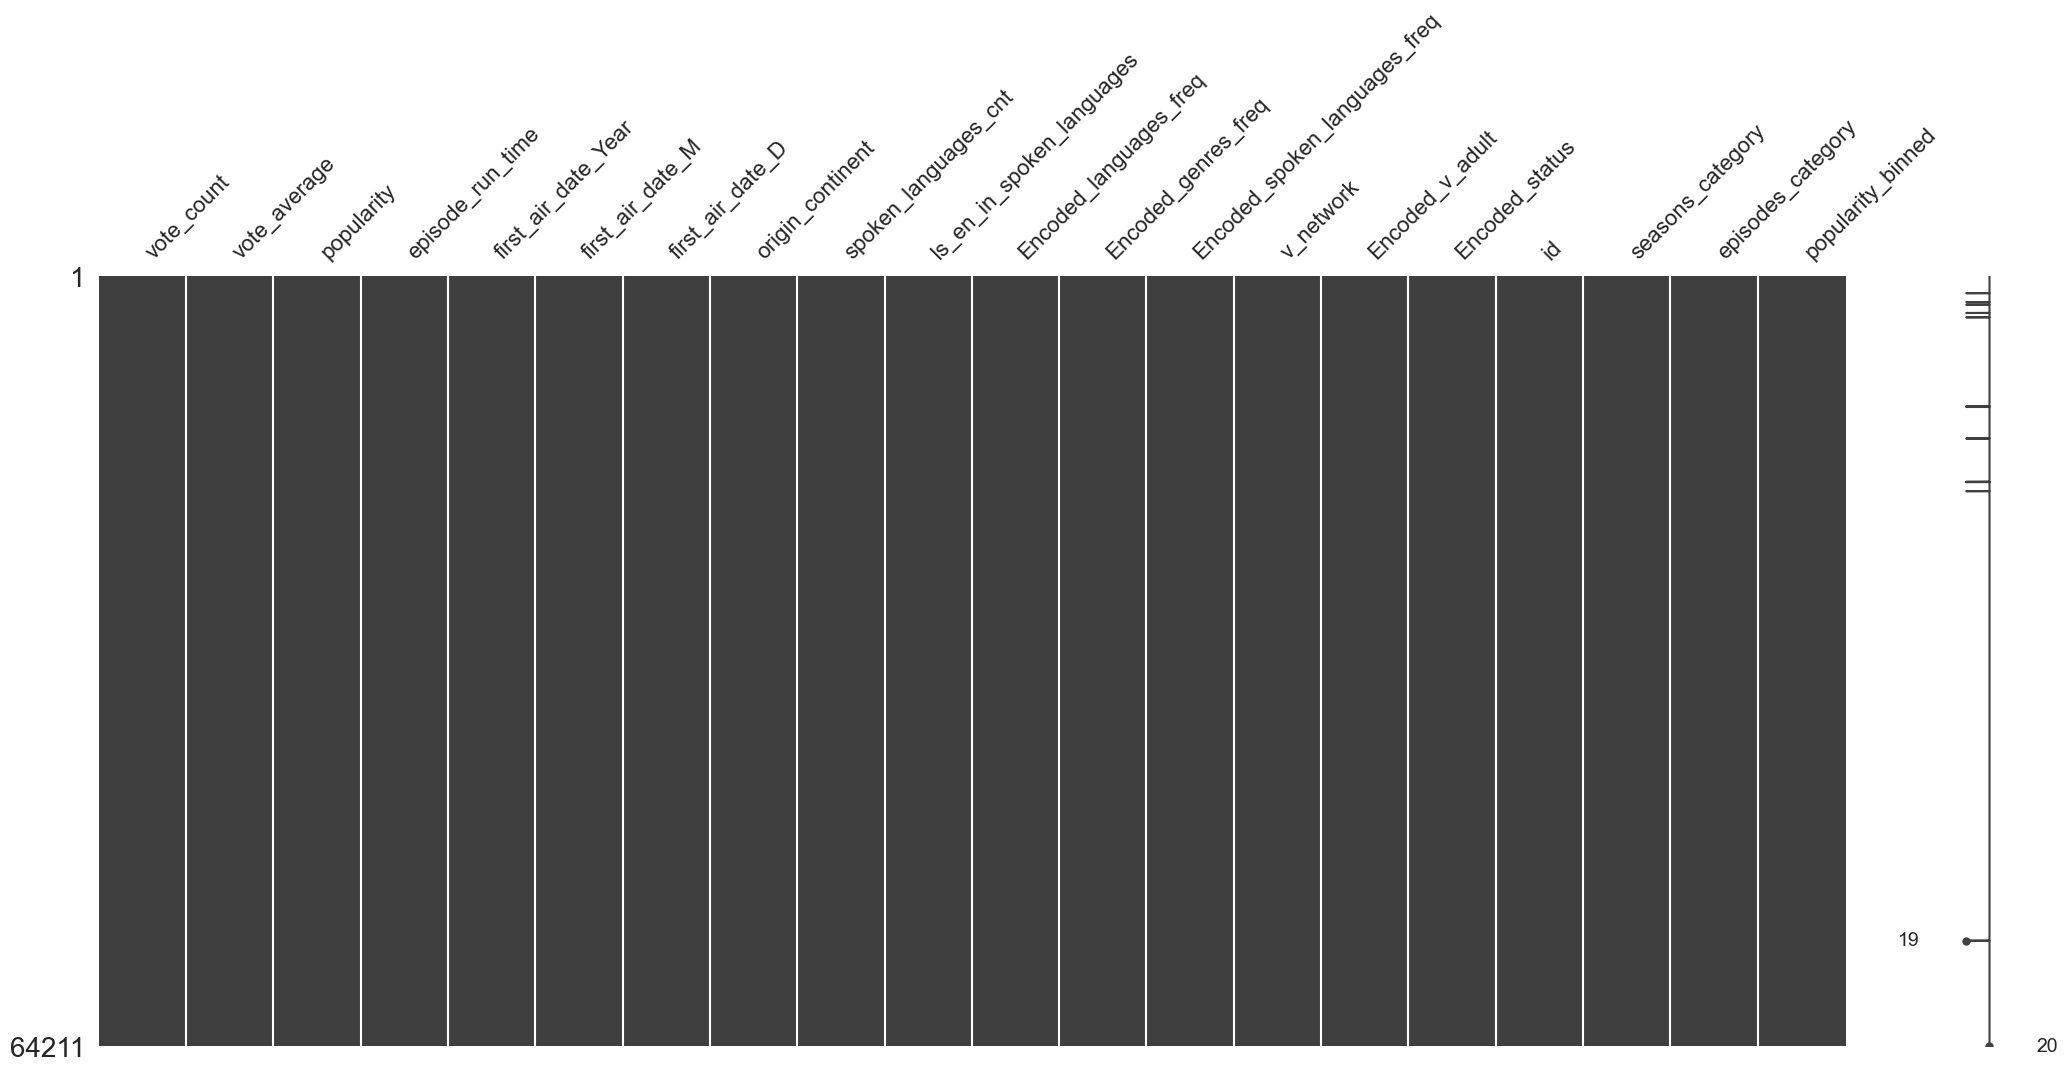

In [120]:
import missingno as msno
msno.matrix(df)   # based on whether data is missing (NaN) or present.

In [121]:
print(df.columns)


Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time',
       'first_air_date_Year', 'first_air_date_M', 'first_air_date_D',
       'origin_continent', 'spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'v_network', 'Encoded_v_adult',
       'Encoded_status', 'id', 'seasons_category', 'episodes_category',
       'popularity_binned'],
      dtype='object')


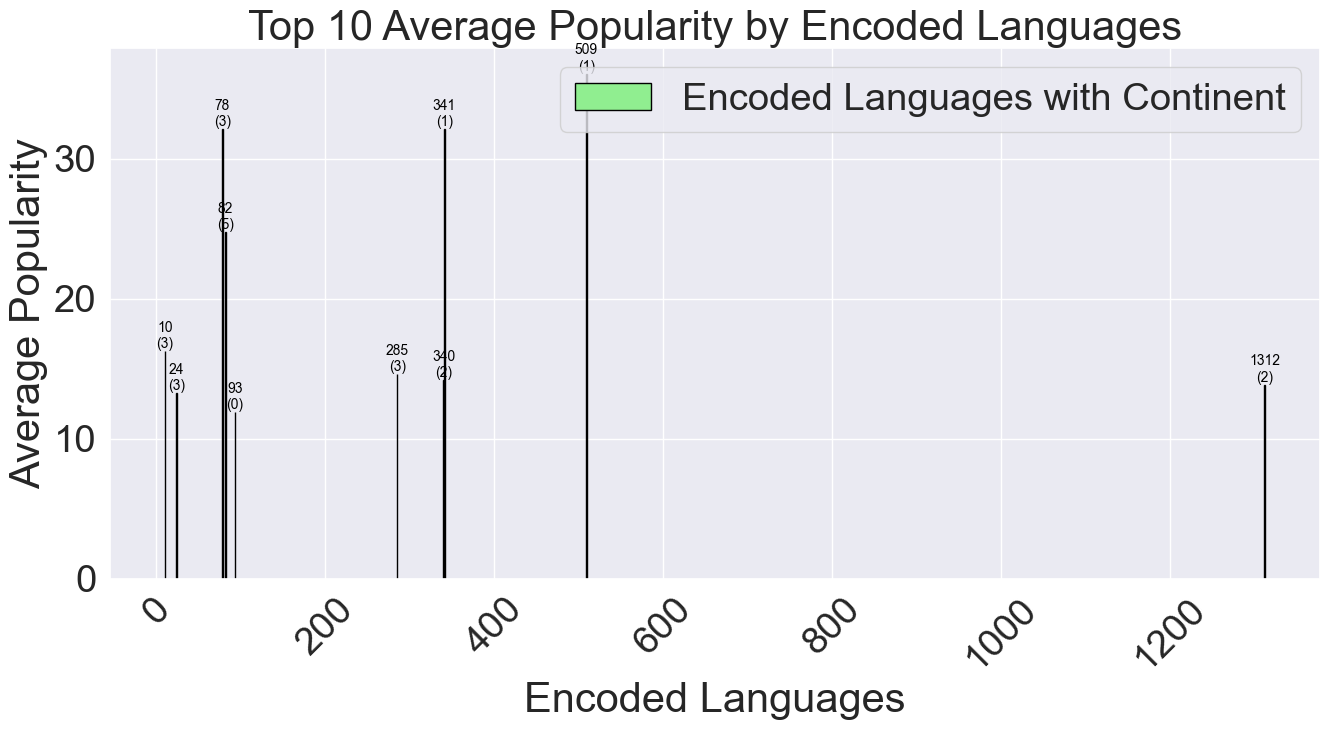

In [122]:
plot_average_popularity_by_encoded_languages(df)
# Encode Languages Legend:
# 'en': 0, 'es': 1, 'en, ko, ur': 2, 'de, en, es': 3, 'ja': 4


# 'de': 5, 'en, es': 6, 'fr': 7, 'en, es, fr, ru': 8, 'en, ko': 9, 'es, it': 10, 'de, en, fr, lt, nl': 11, 'tr': 12, 'ko': 13, 'de, en': 14, 'en, fr, gd': 15, 'es, pt': 16, 'en, tr': 17, 'en, es, ja': 18, 'el, en, es, zh': 19, 'en, ko, pt': 20, 'af, en, is, nn': 21, 'en, pt, th': 22, 'da, en, es': 23, 'en, es, fr': 24, 'en, xx': 25, 'ar, de, en, es, fr, ja, ru, tr': 26, 'en, ro': 27, 'pt': 28, 'en, fr': 29, 'da': 30, 'de, en, ja': 31, 'cn, da, de, en, es, fr, no, pl, pt, sv': 32, 'ca': 33, 'en, ja': 34, 'en, es, it, sv': 35, 'he, pt': 36, 'no': 37, 'en, ur': 38, 'ca, es': 39, 'en, ja, ko, zh': 40,

In [123]:
# Observations Results: 
# :
# Seasons Category:

# Shows that the popularity tends to peak for shows with 3-10 seasons and then slightly declines for those with more seasons.
# The 0-1 category has no valid data (NaN), which suggests there might not be any or enough data for shows with only 1 season.
# Episodes Category:

# Popularity significantly increases with the number of episodes.
# Shows with 500-1000 episodes are particularly popular, which could indicate long-running series tend to accumulate a dedicated audience over time.
# Next Steps:

# Handling NaN Values: You might want to investigate why there are NaN values in the 0-1 seasons category. This could be due to missing data or an absence of shows that fall into this category in your dataset.
# Visualization: 
# Consider plotting these results using a bar chart or a similar visualization to better understand the trends in popularity across these categories.

Average popularity by Seasons Category:
seasons_category
0-1             NaN
1-3        4.486547
3-10      16.197020
10-50     14.305970
50-100     5.666667
Name: popularity, dtype: float64

Average popularity by Episodes Category:
episodes_category
0-10          2.202904
10-50         5.938974
50-100       18.629561
100-500      43.356443
500-1000    172.437500
Name: popularity, dtype: float64


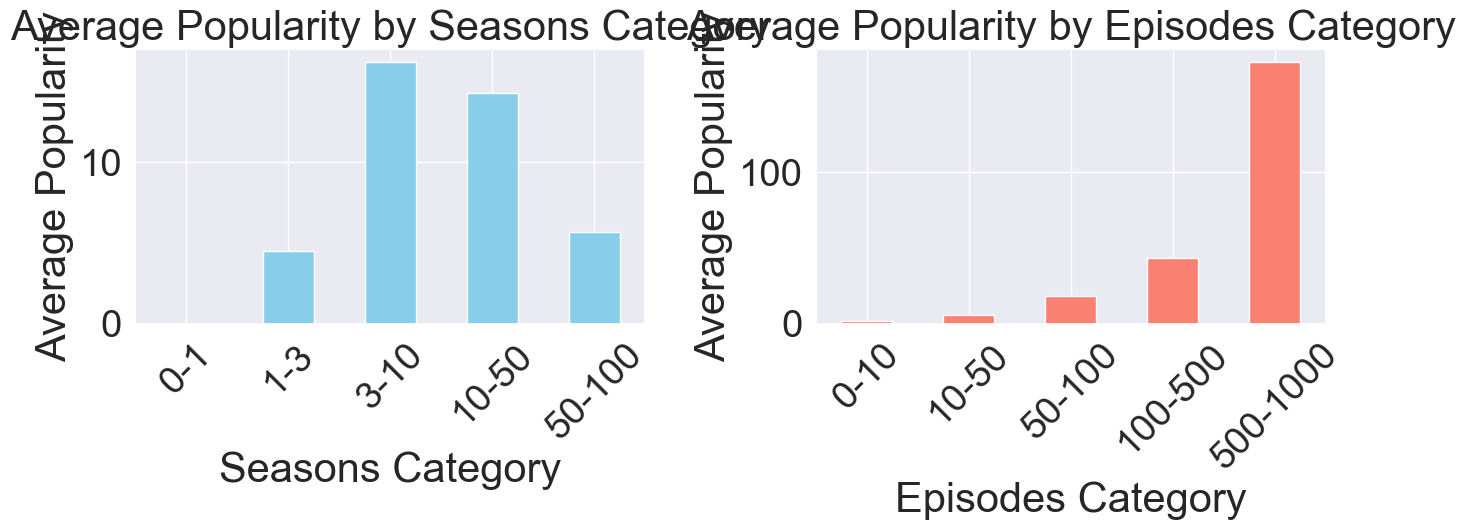

In [124]:
# Calculate the Average Popularity Based on Custom Categories (e.g., by seasons_category and episodes_category):
# You can also analyze how popularity varies with different categories, such as seasons_category and episodes_category.


import pandas as pd
import matplotlib.pyplot as plt

# Calculate the Average Popularity Based on Custom Categories

# Calculate the average popularity by seasons_category
average_popularity_by_seasons = df.groupby('seasons_category')['popularity'].mean()

print("Average popularity by Seasons Category:")
print(average_popularity_by_seasons)

# Calculate the average popularity by episodes_category
average_popularity_by_episodes = df.groupby('episodes_category')['popularity'].mean()

print("\nAverage popularity by Episodes Category:")
print(average_popularity_by_episodes)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot 1: Average Popularity by Seasons Category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
average_popularity_by_seasons.plot(kind='bar', color='skyblue')
plt.title('Average Popularity by Seasons Category')
plt.xlabel('Seasons Category')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)

# Plot 2: Average Popularity by Episodes Category
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
average_popularity_by_episodes.plot(kind='bar', color='salmon')
plt.title('Average Popularity by Episodes Category')
plt.xlabel('Episodes Category')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Seasons Categories and Colors:
Season Category '1-3': skyblue
Season Category '4-6': lightgreen
Season Category '7-9': lightcoral
Season Category '10+': gold

Episodes Categories (no specific colors used):
Episode Category '10-50'
Episode Category '50-100'
Episode Category '100-500'
Episode Category '0-10'
Episode Category '500-1000'
Episode Category 'nan'


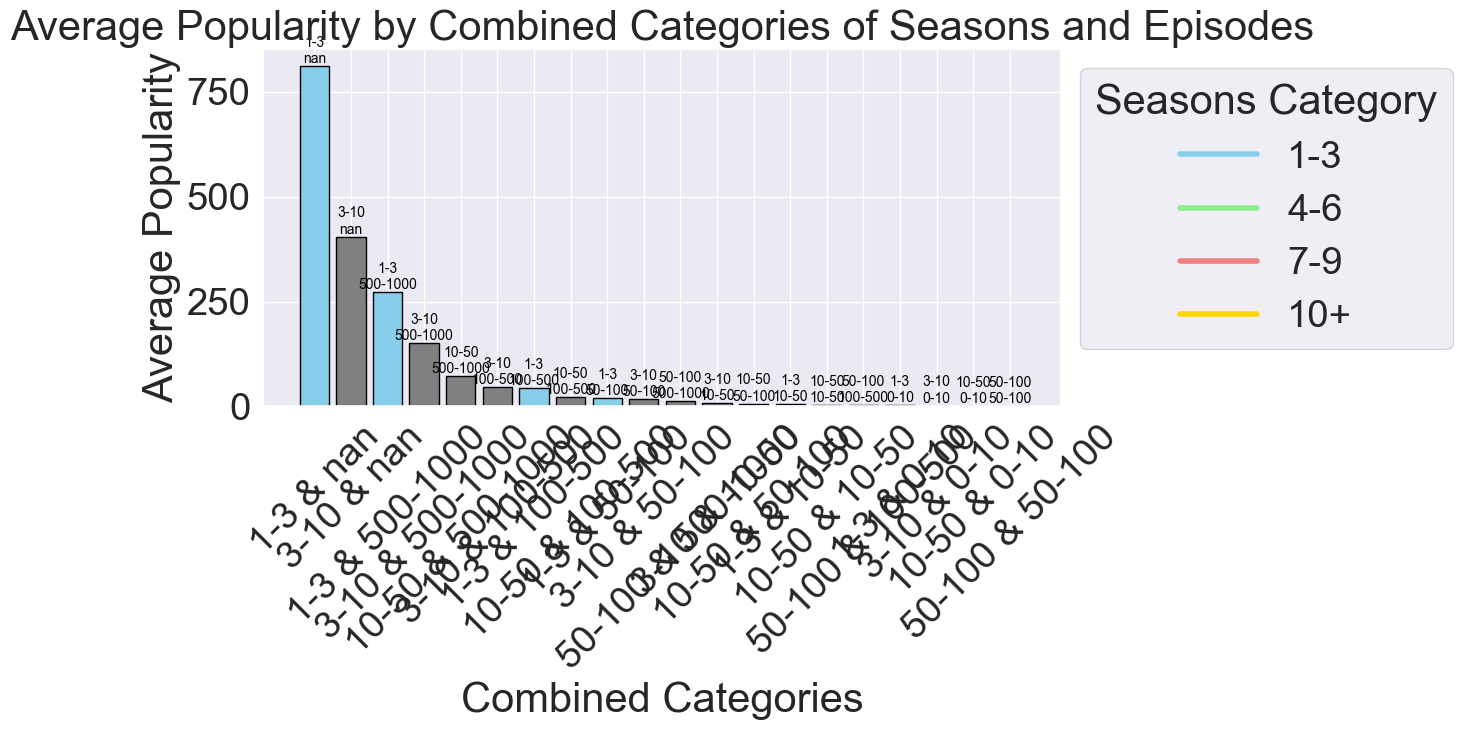


Top 5 Results:
combined_category      popularity
        1-3 & nan          811.50
       3-10 & nan          404.71
   1-3 & 500-1000          272.58
  3-10 & 500-1000          151.77
 10-50 & 500-1000           72.00


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_average_popularity_by_combined_categories(df):
    """
    Calculates and plots the average popularity by combined categories of 'seasons_category' and 'episodes_category'.
    
    Parameters:
    - df: pandas DataFrame containing 'seasons_category', 'episodes_category', and 'popularity' columns.
    """
    # Create a composite category
    df['combined_category'] = df['seasons_category'].astype(str) + ' & ' + df['episodes_category'].astype(str)

    # Calculate the average popularity for each combined category
    average_popularity_by_combined_category = df.groupby('combined_category')['popularity'].mean().reset_index()
    average_popularity_by_combined_category = average_popularity_by_combined_category.sort_values(by='popularity', ascending=False)

    # Define colors for seasons categories
    seasons_colors = {
        '1-3': 'skyblue',
        '4-6': 'lightgreen',
        '7-9': 'lightcoral',
        '10+': 'gold'
    }

    # Create a color mapping for combined categories
    colors = []
    for cat in average_popularity_by_combined_category['combined_category']:
        season_cat, _ = cat.split(' & ')
        color = seasons_colors.get(season_cat, 'grey')  # Default to grey if not found
        colors.append(color)

    # Print categories and their colors
    print("Seasons Categories and Colors:")
    for season_cat, color in seasons_colors.items():
        print(f"Season Category '{season_cat}': {color}")

    print("\nEpisodes Categories (no specific colors used):")
    episodes_categories = df['episodes_category'].unique()
    for episode_cat in episodes_categories:
        print(f"Episode Category '{episode_cat}'")

    # Plotting the results
    plt.figure(figsize=(14, 8))

    # Plot bars
    bars = plt.bar(average_popularity_by_combined_category['combined_category'], 
                   average_popularity_by_combined_category['popularity'],
                   color=colors, edgecolor='black')

    # Add text labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        combined_cat = average_popularity_by_combined_category.iloc[i]['combined_category']
        season_cat, episode_cat = combined_cat.split(' & ')
        
        label_text = f"{season_cat}\n{episode_cat}"
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 label_text, ha='center', va='bottom', fontsize=10, color='black')

    # Add legend for seasons category
    season_patches = [plt.Line2D([0], [0], color=color, lw=4) for color in seasons_colors.values()]
    plt.legend(season_patches, seasons_colors.keys(), title="Seasons Category", loc='upper left', bbox_to_anchor=(1, 1))

    plt.title('Average Popularity by Combined Categories of Seasons and Episodes')
    plt.xlabel('Combined Categories')
    plt.ylabel('Average Popularity')
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

    # Print the top 5 results in bold
    top_5 = average_popularity_by_combined_category.head(5)
    print("\nTop 5 Results:")
    print(top_5.to_string(index=False, formatters={'popularity': '{:,.2f}'.format}, col_space=15))

# Example usage
plot_average_popularity_by_combined_categories(df)






In [126]:
# Summary of Insights:
# High Popularity: Categories with seasons_category of 1-3 (whether or not episodes category is defined) tend to have higher popularity scores. Specifically, the combination 1-3 & nan shows the highest average popularity.
# Missing Data Impact: Missing data in the episodes_category seems to be associated with higher popularity in the seasons_category.
# Lower Popularity: Categories with a broader range in seasons_category (e.g., 10-50) and defined episodes_category tend to have lower average popularity scores.


# Cleansing step 3 : Work to add episode imputation

# Combining Categories
# Categories:

# seasons_category might have categories like 1-3, 4-10, 10-50, etc.
# episodes_category might have categories like 0-100, 100-500, 500-1000, etc.
# Creating Combinations:

# You create a new category for each possible combination of seasons_category and episodes_category.
# For example, if you have 3 seasons categories and 3 episodes categories, you will have 3 x 3 = 9 unique combinations.
# Example
# Suppose you have the following categories:

# Seasons Categories: 1-3, 4-10, 10-50
# Episodes Categories: 0-100, 100-500, 500-1000
# The combinations would be:

# 1-3 & 0-100
# 1-3 & 100-500
# 1-3 & 500-1000
# 4-10 & 0-100
# 4-10 & 100-500
# 4-10 & 500-1000
# 10-50 & 0-100
# 10-50 & 100-500
# 10-50 & 500-1000

<Axes: >

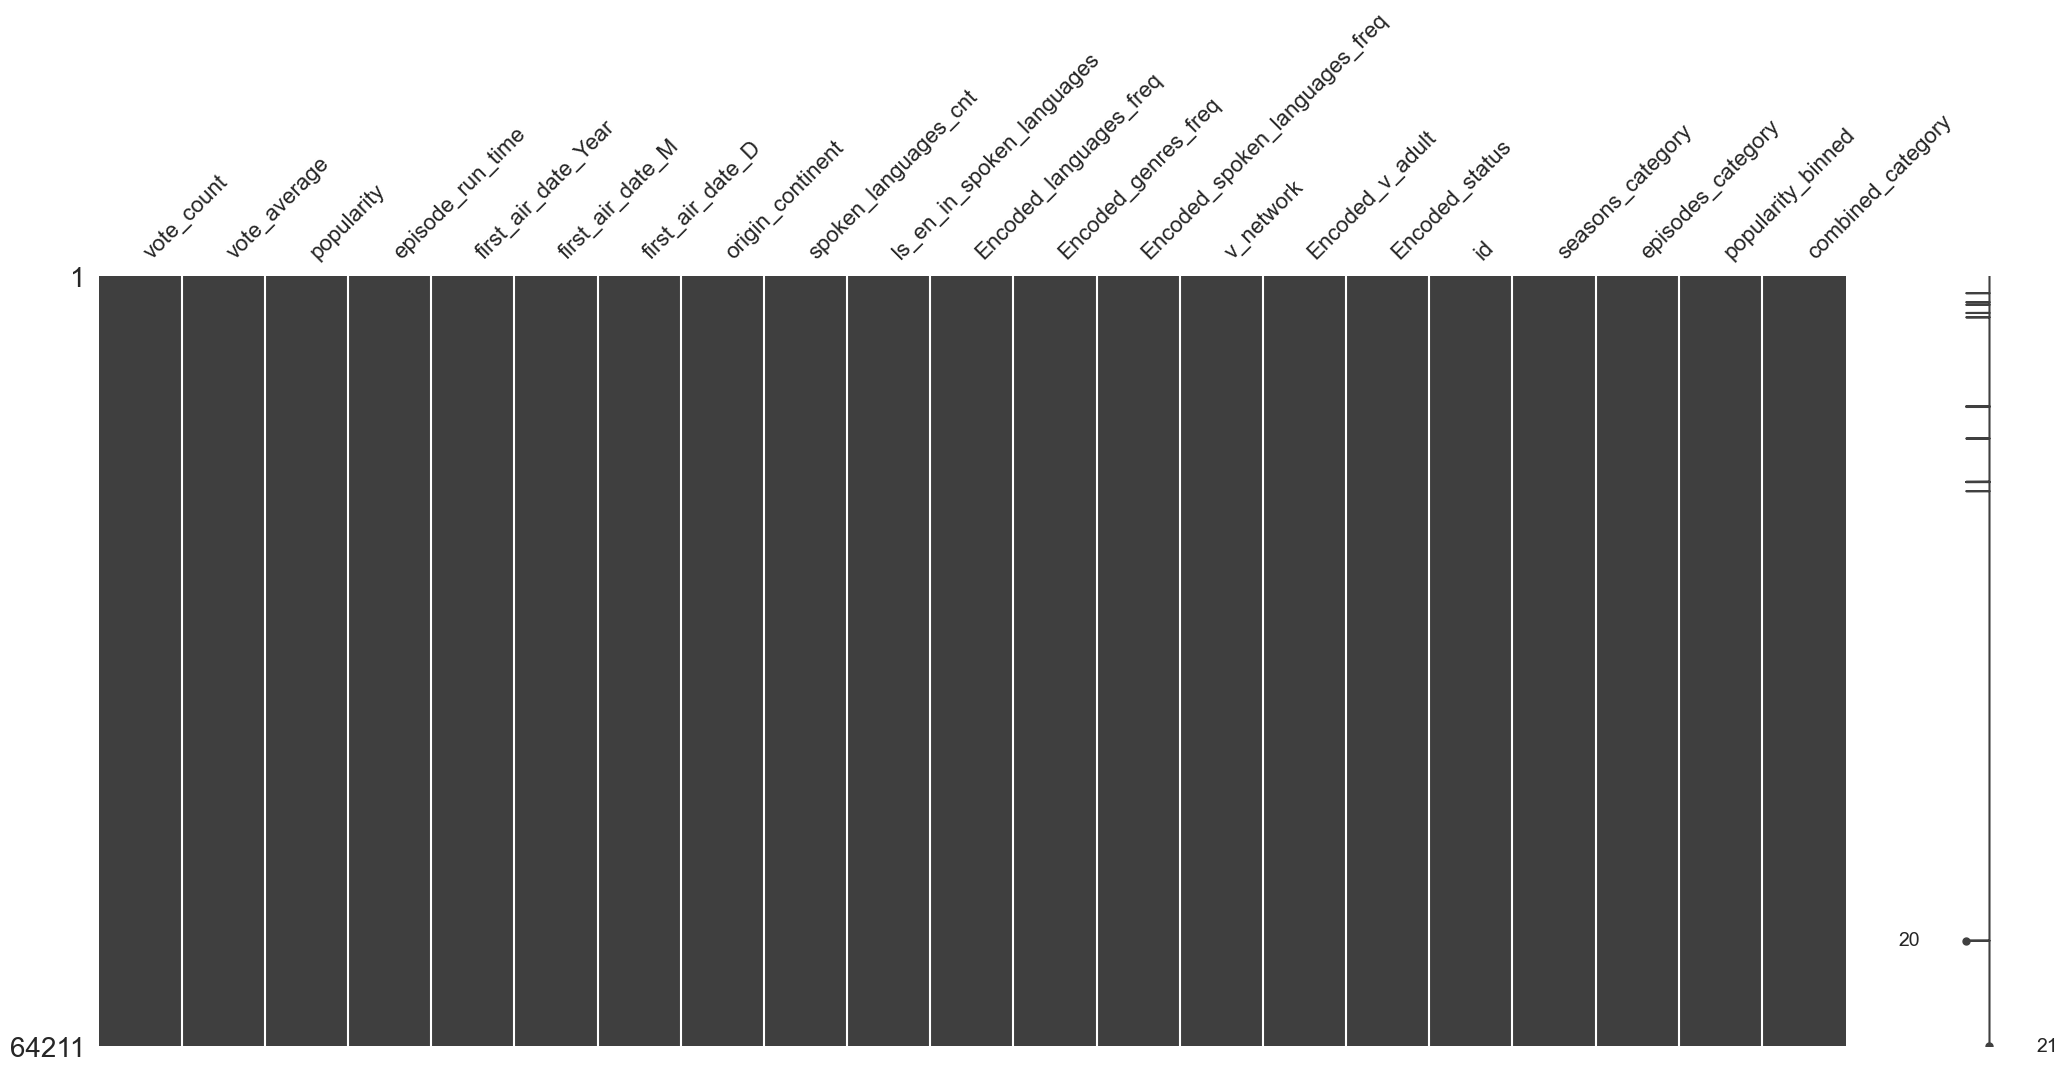

In [127]:
import missingno as msno
msno.matrix(df)   # based on whether data is missing (NaN) or present.

Top 5 Average Popularity by Combined Categories:
combined_category
1-3 & nan           811.500000
3-10 & nan          404.714286
1-3 & 500-1000      272.583333
3-10 & 500-1000     151.774194
10-50 & 500-1000     72.000000
Name: popularity, dtype: float64


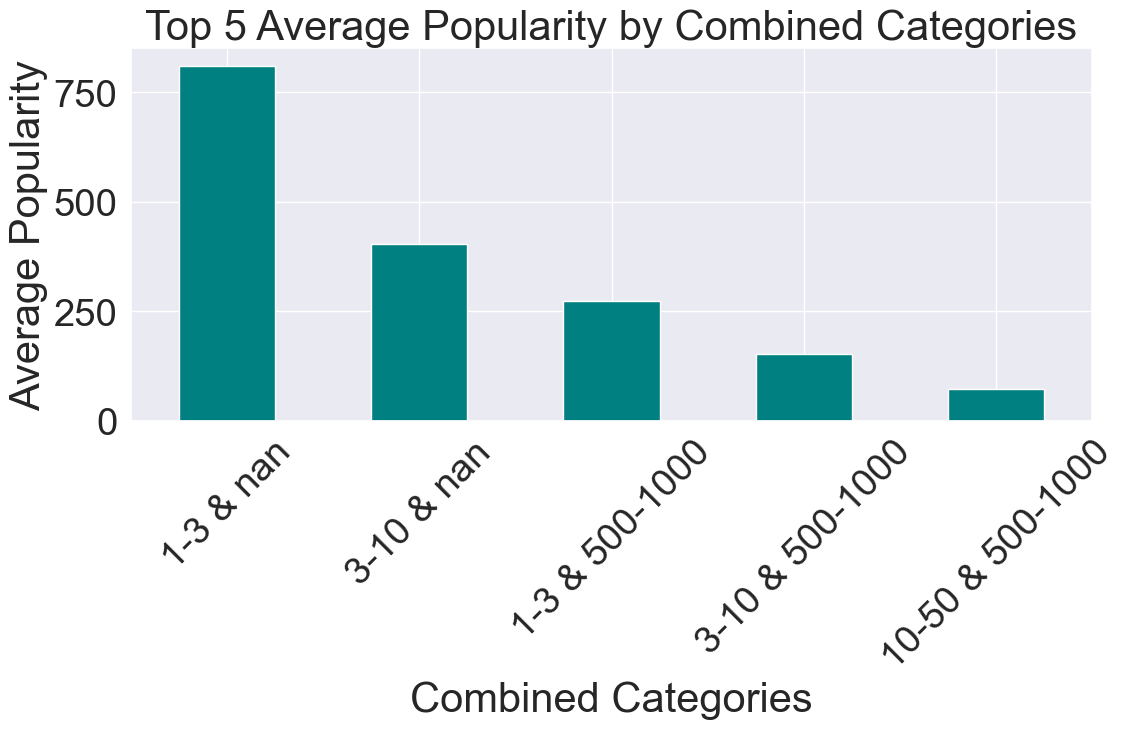

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new combined category column
df['combined_category'] = df['seasons_category'].astype(str) + ' & ' + df['episodes_category'].astype(str)

# Calculate average popularity by the combined category
average_popularity_by_combined_category = df.groupby('combined_category')['popularity'].mean()

# Print top 5 results
top_5_combined = average_popularity_by_combined_category.nlargest(5)
print("Top 5 Average Popularity by Combined Categories:")
print(top_5_combined)

# Plotting the results
plt.figure(figsize=(12, 8))
top_5_combined.plot(kind='bar', color='teal')
plt.title('Top 5 Average Popularity by Combined Categories')
plt.xlabel('Combined Categories')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [129]:
# Calculate Average Popularity Based on Other Features:
# You can perform similar calculations for other features like origin_continent, Encoded_genres, etc.

# Average popularity by origin_continent
average_popularity_by_origin_continent = df.groupby('origin_continent')['popularity'].mean()

print("\nAverage popularity by Origin Continent:")
print(average_popularity_by_origin_continent)

# Average popularity by Encoded_genres
average_popularity_by_encoded_genres = df.groupby('Encoded_genres_freq')['popularity'].mean()

print("\nAverage popularity by Encoded Genres:")
print(average_popularity_by_encoded_genres)



Average popularity by Origin Continent:
origin_continent
0    3.150538
1    6.209735
2    4.989099
3    8.753735
4    9.972578
5    4.048436
Name: popularity, dtype: float64

Average popularity by Encoded Genres:
Encoded_genres_freq
1        10.327189
2        10.992063
3        13.443396
4        11.035088
5        10.831683
           ...    
8009      4.105566
10304     4.052679
16282     7.113035
17596     1.912752
68926     1.910328
Name: popularity, Length: 161, dtype: float64


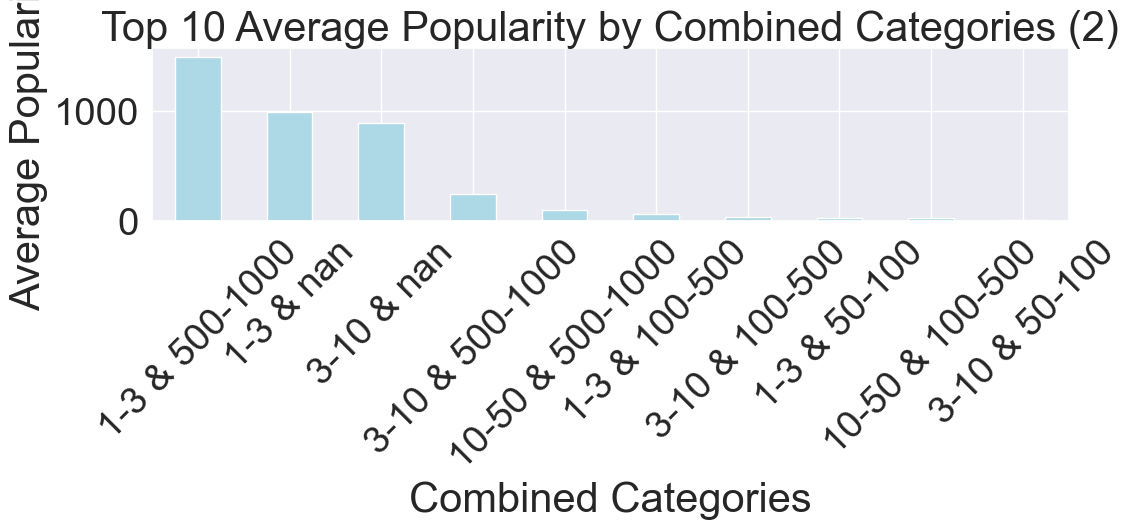

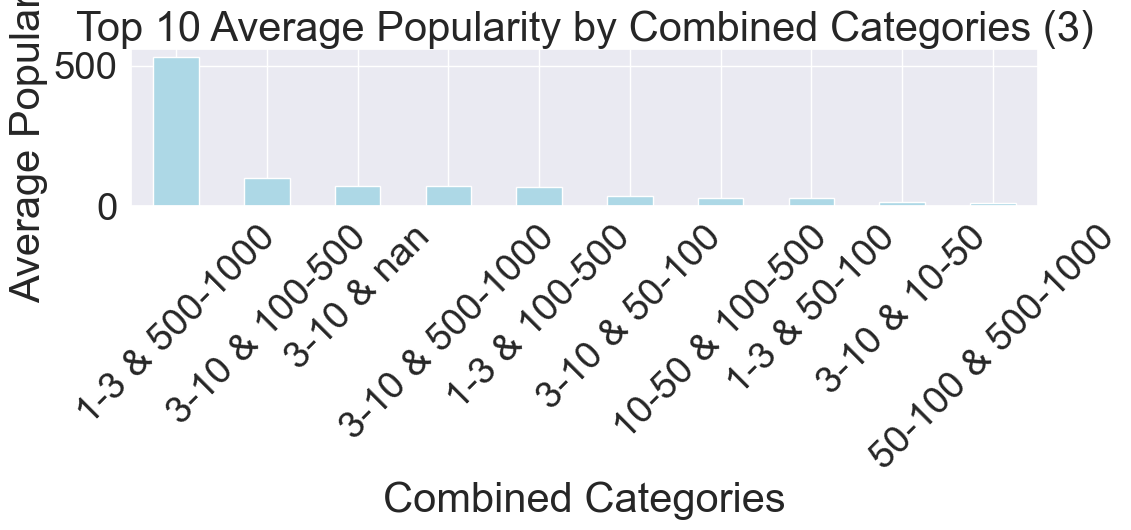

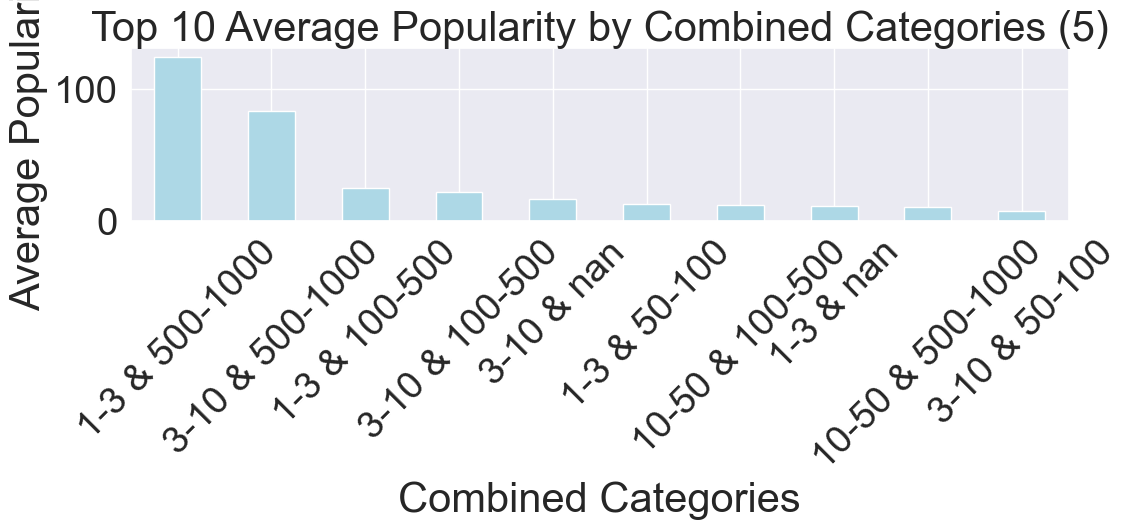

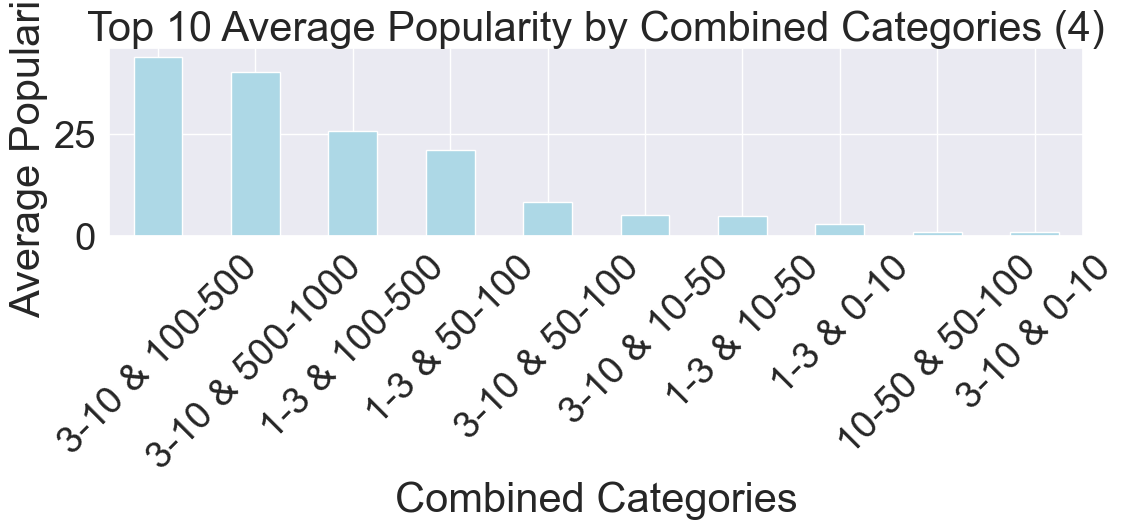

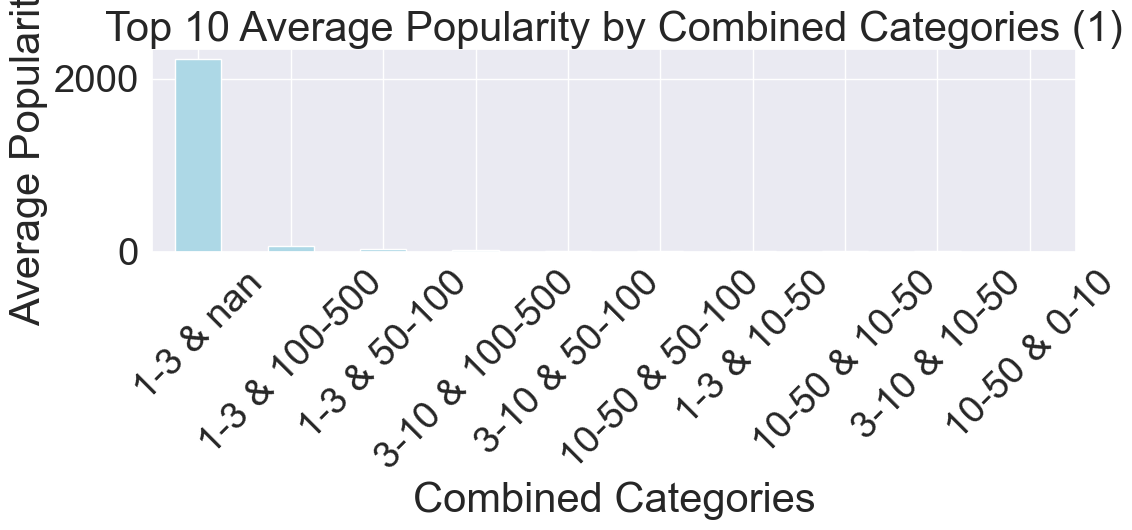

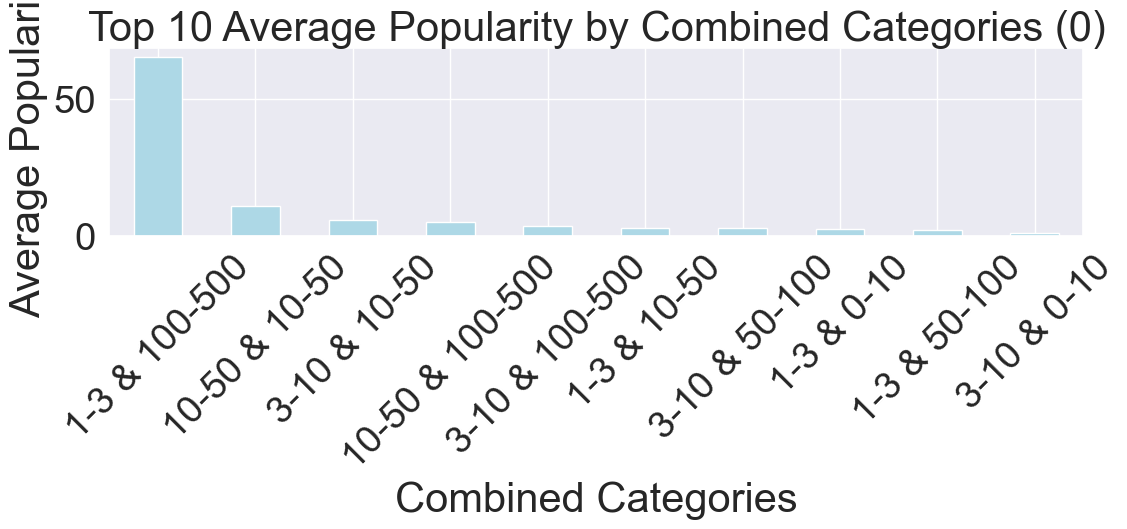

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure combined category column is created
df['combined_category'] = df['seasons_category'].astype(str) + ' & ' + df['episodes_category'].astype(str)

# Get unique continents
continents = df['origin_continent'].unique()

# Create a plot for each continent
for continent in continents:
    # Filter the DataFrame by the current continent
    df_continent = df[df['origin_continent'] == continent]

    # Calculate average popularity by the combined category for this continent
    average_popularity_by_combined_category = df_continent.groupby('combined_category')['popularity'].mean()

    # Sort and select top 10 categories for better visualization
    top_categories = average_popularity_by_combined_category.sort_values(ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(12, 6))
    top_categories.plot(kind='bar', color='lightblue')
    plt.title(f'Top 10 Average Popularity by Combined Categories ({continent})')
    plt.xlabel('Combined Categories')
    plt.ylabel('Average Popularity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Average popularity by Origin Continent:
origin_continent
0    3.150538
1    6.209735
2    4.989099
3    8.753735
4    9.972578
5    4.048436
Name: popularity, dtype: float64

Average popularity by Encoded Genres:
Encoded_genres_freq
1        10.327189
2        10.992063
3        13.443396
4        11.035088
5        10.831683
           ...    
8009      4.105566
10304     4.052679
16282     7.113035
17596     1.912752
68926     1.910328
Name: popularity, Length: 161, dtype: float64


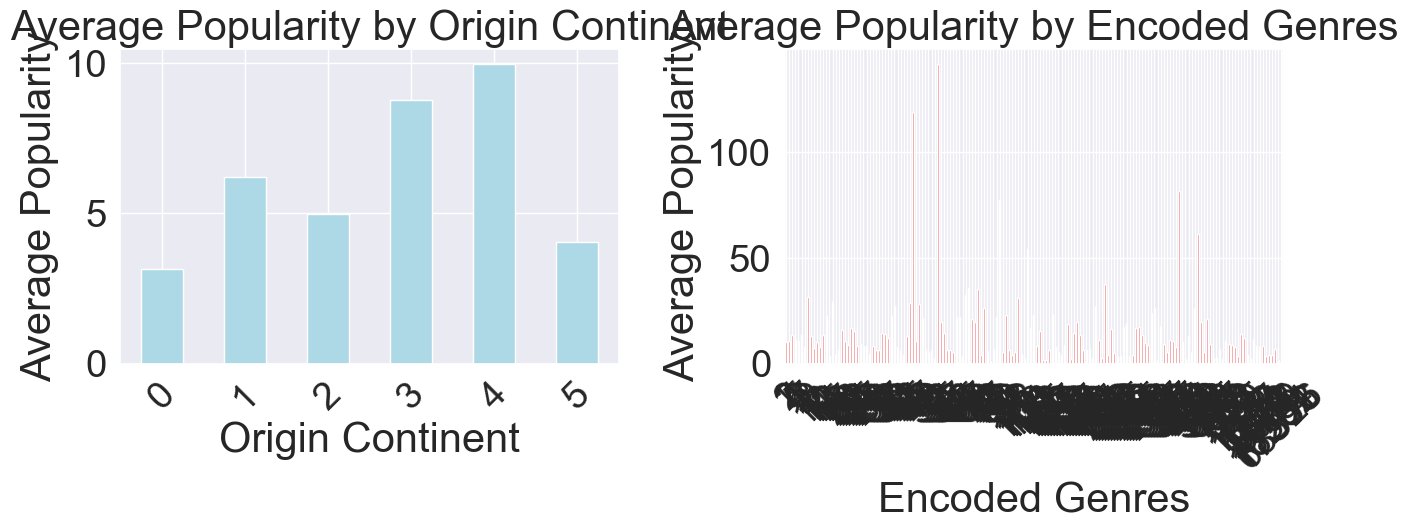

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with relevant columns
# df = pd.DataFrame({ ... })

# Average popularity by origin_continent
average_popularity_by_origin_continent = df.groupby('origin_continent')['popularity'].mean()

print("\nAverage popularity by Origin Continent:")
print(average_popularity_by_origin_continent)

# Average popularity by Encoded_genres
average_popularity_by_encoded_genres = df.groupby('Encoded_genres_freq')['popularity'].mean()

print("\nAverage popularity by Encoded Genres:")
print(average_popularity_by_encoded_genres)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot: Average Popularity by Origin Continent
plt.subplot(1, 2, 1)
average_popularity_by_origin_continent.plot(kind='bar', color='lightblue')
plt.title('Average Popularity by Origin Continent')
plt.xlabel('Origin Continent')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)

# Plot: Average Popularity by Encoded Genres
plt.subplot(1, 2, 2)
average_popularity_by_encoded_genres.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Encoded Genres')
plt.xlabel('Encoded Genres')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [132]:
#  0    [Sci-Fi & Fantasy,  Drama,  Action & Adventure]
# 1                                    [Crime,  Drama]
# 2               [Drama,  Sci-Fi & Fantasy,  Mystery]
# 3    [Action & Adventure,  Drama,  Sci-Fi & Fantasy]
# 4                         [Crime,  Sci-Fi & Fantasy]

In [133]:
import pandas as pd
from dataprep.eda import create_report

# Create a profile report
report = create_report(df)

# Save the report to an HTML file
report.save('report.html')

  0%|                                                                                         | 0/3103 [00:00<…

Report has been saved to report.html!


In [134]:
df


vote_count  vote_average  popularity  episode_run_time  \
1          17836.0           8.0        96.0              70.0   
2          16161.0           9.0       186.0               0.0   
4          13870.0           8.0       417.0              45.0   
5          13180.0           8.0       144.0              45.0   
6          13053.0           8.0       116.0               0.0   
...            ...           ...         ...               ...   
168630         0.0           0.0         4.0               0.0   
168633         0.0           0.0         3.0               0.0   
168634         0.0           0.0         1.0               0.0   
168636         0.0           0.0         2.0               0.0   
168638         0.0           0.0         2.0               0.0   

        first_air_date_Year  first_air_date_M  first_air_date_D  \
1                      2017                 5                 2   
2                      2016                 7                15   
4                      2016                 1                25   
5                      2017                 1                26   
6                      2021                 9                17   
...                     ...               ...               ...   
168630                 2023                11                20   
168633                 2023                11                30   
168634                 2023                 3                 3   
168636                 2023                11                30   
168638                 2016                 1                 1   

        origin_continent  spoken_languages_cnt Is_en_in_spoken_languages  ...  \
1                      2                   1.0                     False  ...   
2                      3                   1.0                      True  ...   
4                      3                   1.0                      True  ...   
5                      3                   1.0                      True  ...   
6                      5                   3.0                      True  ...   
...                  ...                   ...                       ...  ...   
168630                 5                   1.0                     False  ...   
168633                 2                   1.0                     False  ...   
168634                 5                   1.0                     False  ...   
168636                 5                   1.0                     False  ...   
168638                 3                   1.0                      True  ...   

        Encoded_genres_freq  Encoded_spoken_languages_freq  v_network  \
1                       985                           5178          2   
2                       110                          73268          2   
4                        14                          73268          2   
5                       409                          73268          4   
6                        38                              1          2   
...                     ...                            ...        ...   
168630                16282                           1405          4   
168633                   25                           7377          4   
168634                68926                          14181          4   
168636                 1037                            195          4   
168638                68926                          73268          4   

        Encoded_v_adult Encoded_status      id  seasons_category  \
1                     0              0   71446              3-10   
2                     0              1   66732              3-10   
4                     0              0   63174              3-10   
5                     0              0   69050              3-10   
6                     0              1   93405               1-3   
...                 ...            ...     ...               ...   
168630                0              1  240293               1-3   
168633          

In [135]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the OLS model
# 'popularity ~ C(Is_en_in_spoken_languages)' indicates that 'popularity' is the dependent variable
# and 'Is_en_in_spoken_languages' is the categorical independent variable
model = smf.ols('popularity ~ C(Is_en_in_spoken_languages)', data=df).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA results
print(anova_results)

# Extracting the p-value from the ANOVA results
p_value = anova_results['PR(>F)']['C(Is_en_in_spoken_languages)']
t_stat = model.tvalues['C(Is_en_in_spoken_languages)[T.True]']

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in popularity between the two groups.")
else:
    print("There is no significant difference in popularity between the two groups.")

                                    sum_sq       df          F    PR(>F)
C(Is_en_in_spoken_languages)  3.356206e+04      1.0  21.905575  0.000003
Residual                      9.837616e+07  64209.0        NaN       NaN
T-statistic: 4.6803391678838695
P-value: 2.869843104642908e-06
There is a significant difference in popularity between the two groups.


T-statistic: 17.28404433929283
P-value: 8.792785715221146e-67


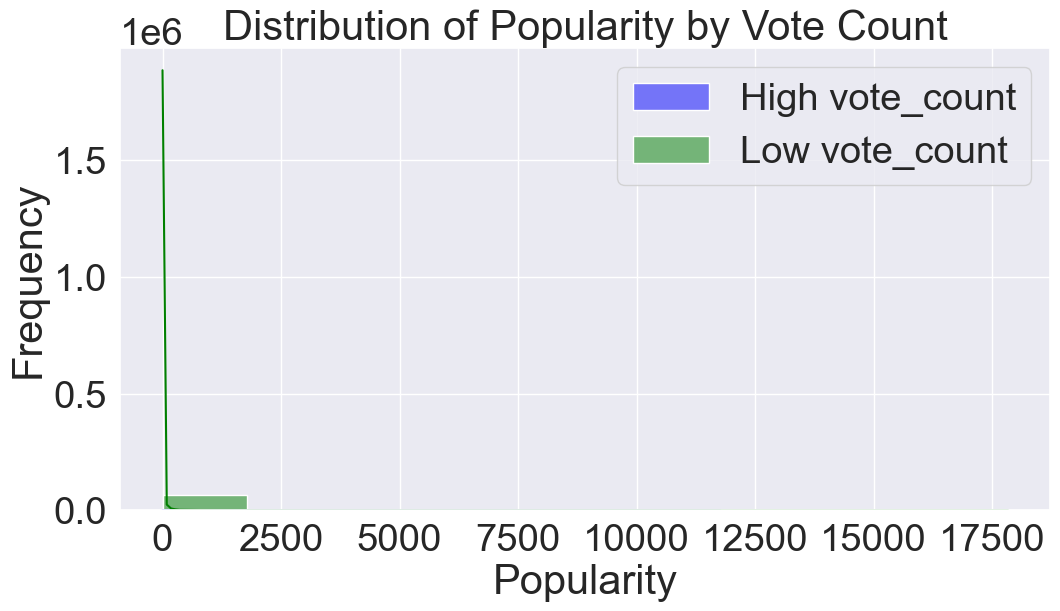

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Separate the popularity data based on vote_count
Is_en = df[df['popularity'] > 500]['vote_count']
non_Is_en = df[df['popularity'] <= 500]['vote_count']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(Is_en, non_Is_en)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution of popularity for different vote_count groups
plt.figure(figsize=(12, 6))
sns.histplot(Is_en, kde=True, color='blue', label='High vote_count', alpha=0.5, bins=10)
sns.histplot(non_Is_en, kde=True, color='green', label='Low vote_count', alpha=0.5, bins=10)
plt.title('Distribution of Popularity by Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [137]:

# Your dataset provides a comprehensive overview, and here’s how to approach the analysis and processing based on the provided statistics:

# Dataset Statistics Overview
# Number of Variables: 24
# Number of Rows: 64,211
# Missing Cells: 0
# Duplicate Rows: 0
# Total Size in Memory: 21.2 MB
# Average Row Size in Memory: 346.2 B
# Variable Types:
# Numerical: 13
# Categorical: 11
# Dataset Insights
# Skewed Variables:
# number_of_seasons
# number_of_episodes
# vote_count
# vote_average
# popularity
# episode_run_time
# spoken_languages_cnt
# Encoded_languages
# Encoded_genres
# Encoded_spoken_languages
# Steps to Handle Dataset Insights
# Understand Skewness:

# Skewness indicates that the distribution of the data is not symmetric. In machine learning, high skewness can affect model performance and predictions.
# Address Skewness:

# Transformation Techniques:
# Log Transformation: Useful for reducing positive skewness. Apply np.log1p() to the data.
# Square Root Transformation: Effective for moderate skewness. Apply np.sqrt() to the data.
# Box-Cox Transformation: A more flexible method that can handle both positive and negative skewness. Use scipy.stats.boxcox().
# Normalization:
# Min-Max Scaling: Scales data to a fixed range, usually 0 to 1.
# Standardization: Transforms data to have a mean of 0 and a standard deviation of 1.
# General Data Preparation:

# Feature Engineering: Create new features or modify existing ones based on domain knowledge and insights from the data.
# Outlier Detection: Identify and handle outliers as they can disproportionately influence the skewness.
# Encoding Categorical Variables: Use techniques like one-hot encoding or label encoding for categorical variables.

In [138]:
#Skewness indicates that the distribution of the data is not symmetric. In machine learning, high skewness can affect model performance and predictions.

In [139]:
# 1. High Cardinality
# c_name and Encoded_c_name: Both columns have 62,345 distinct values.
# Impact: High cardinality in categorical features can lead to challenges in encoding, memory usage, and overfitting in models.
# Actions:
# Feature Reduction: Consider reducing the dimensionality by grouping rare categories or using techniques like target encoding, which can help in handling high cardinality.

In [140]:
# from scipy.stats import ttest_ind

# # Define a function for T-test
# def t_test(parameter, df):
#     categories = df['popularity'].unique()
#     results = {}
#     for cat in categories:
#         group = df[df['popularity'] == cat][parameter]
#         results[cat] = group
    
#     print(f"T-test for {parameter}:")
#     for i, cat1 in enumerate(categories):
#         for j, cat2 in enumerate(categories):
#             if i < j:
#                 t_stat, p_value = ttest_ind(results[cat1], results[cat2], equal_var=False)
#                 print(f"Comparing {cat1} vs {cat2}")
#                 print(f"T-statistic: {t_stat}")
#                 print(f"P-value: {p_value}\n")

# # Perform T-tests for each parameter
# for param in ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average']:
#     t_test(param, df)

## 2
<!-- . Constant Value
Encoded_v_adult: The column has a constant value "0".
Impact: Constant value columns do not provide any useful information for modeling.
Actions:
Drop the Column: Since it does not contribute to variability, it can be safely removed from the dataset. -->

In [141]:
# # 3. Constant Length
# first_air_date_Year, is_duplicate_except_last, Encoded_status, and Encoded_v_adult: All these columns have constant lengths.
# Impact: Constant lengths might indicate uniform data types, but on their own, they don't necessarily pose a problem unless they align with constant values or add little to no variability.
# Actions:
# Review for Redundancy: Ensure these columns aren’t redundant or duplicate information already captured by other features. If they are redundant, consider dropping them.

In [142]:
# ## 4 


# The dataset insights you’ve provided highlight some key characteristics that could impact your data preprocessing and model building. Here's a breakdown of these insights and potential actions to take:

# 1. High Cardinality
# c_name and Encoded_c_name: Both columns have 62,345 distinct values.
# Impact: High cardinality in categorical features can lead to challenges in encoding, memory usage, and overfitting in models.
# Actions:
# Feature Reduction: Consider reducing the dimensionality by grouping rare categories or using techniques like target encoding, which can help in handling high cardinality.
# Embedding: If using deep learning models, embedding layers can be useful for handling high cardinality features.
# 2. Constant Value
# 4.
# High Proportion of Zeros
# vote_count (59.78%), vote_average (59.82%), and episode_run_time (51.72%): These columns have a significant proportion of zeros.
# Impact: A high number of zeros can indicate sparsity, which may affect certain models, especially those sensitive to the distribution of the data.
# Actions:
# Transformations: Consider applying transformations to reduce skewness and improve model performance.
# Feature Engineering: You could create additional features to capture whether a value is zero or non-zero, or to handle these as a special category.
# Imputation: Evaluate if zeros are meaningful or if they need to be treated as missing values.

In [143]:
# The dataset provides detailed insights into various columns, revealing patterns and characteristics that can guide further analysis and preprocessing steps. Here are the key insights:

# High Cardinality
# c_name and Encoded_c_name: Both columns have a very high cardinality with 62,345 distinct values. This suggests that these columns represent unique identifiers or names with a high degree of variability.
# Constant Values
# Encoded_v_adult: This column has a constant value of "0", meaning there is no variability, and it might be unnecessary for further analysis.
# first_air_date_Year, is_duplicate_except_last, Encoded_status, Encoded_v_adult: These columns have a constant length, indicating uniformity in their data.
# Zeros and Skewness
# vote_count, vote_average, episode_run_time, popularity: These columns have a significant percentage of zeros, which could indicate sparsity or missing information. Additionally, these columns are all skewed to the right, suggesting that the distribution of values is heavily weighted towards the lower end.
# Right-Skewed Columns
# number_of_seasons, number_of_episodes, vote_count, vote_average, episode_run_time, popularity, spoken_languages_cnt, Encoded_languages, Encoded_genres, Encoded_spoken_languages: These columns exhibit a right-skewed distribution, indicating that most of the values are concentrated on the lower end, with a few outliers on the higher end.
# Categorical Columns with Dominant Values
# status, v_adult, origin_continent, Is_en_in_spoken_languages, v_network: These columns have a dominant value that occurs significantly more frequently than the others. For example, "Returning Series" in the status column is much more frequent than the next most common value.
# Additional Observations
# number_of_seasons and number_of_episodes: These columns are related and are both skewed right, indicating that most shows have a small number of seasons and episodes, with a few having many.
# id: This column has a high cardinality and is slightly skewed to the right, which is typical for identifiers.
# Potential Next Steps
# Encoding and Dimensionality Reduction: The high cardinality of certain columns like c_name and Encoded_c_name might require dimensionality reduction or encoding techniques to manage their complexity.
# Handling Zeros and Skewness: The columns with a high percentage of zeros and skewness might need transformation (e.g., log transformation) or imputation strategies.
# Feature Selection: Constant or near-constant columns such as Encoded_v_adult might be candidates for removal, as they may not contribute much to predictive modeling.
# Outlier Detection: Right-skewed columns may contain outliers that could affect model performance, so outlier detection methods should be considered.
# These insights can help in deciding which preprocessing steps to apply before proceeding with any machine learning models or statistical analysis.

In [144]:
# copy from orit code  remove outliers  from whatup
# continue with EDA notebook if needed more functions.
# 3 Data Cleansing today Deliver  Mark

In [145]:
# Save the cleaned DataFrame to an Excel file Remove dup of id .
output_file = 'cleaned_data_column_End_EDA_2015_2023.xlsx'
df.to_excel(output_file, index=True)

KeyboardInterrupt: 

In [146]:
df.to_pickle('cleaned_data_column_End_EDA_2015_2023.pkl')

In [147]:
# Final EDA  File 
import pandas as pd
#load from pickle 
dfload1 = pd.read_pickle('cleaned_data_column_End_EDA_2015_2023.pkl')



In [148]:
dfload1.columns


Index(['vote_count', 'vote_average', 'popularity', 'episode_run_time',
       'first_air_date_Year', 'first_air_date_M', 'first_air_date_D',
       'origin_continent', 'spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'v_network', 'Encoded_v_adult',
       'Encoded_status', 'id', 'seasons_category', 'episodes_category',
       'popularity_binned', 'combined_category'],
      dtype='object')

In [149]:
# Create a DataFrame with data types and unique values count
info_df = pd.DataFrame({
    'Column': dfload1.columns,
    'Data Type': [dfload1[col].dtype for col in dfload1.columns],
    'Unique Values': [dfload1[col].nunique() for col in dfload1.columns],
     'Unique Values List': [dfload1[col].unique().tolist() if dfload1[col].nunique() < 20 else None for col in dfload1.columns  ]
    
    
})

# Print the table
(info_df)

Column Data Type  Unique Values  \
0                      vote_count   float64            740   
1                    vote_average   float64             11   
2                      popularity   float64            303   
3                episode_run_time   float64            282   
4             first_air_date_Year     int64              8   
5                first_air_date_M     int64             12   
6                first_air_date_D     int64             31   
7                origin_continent      int8              6   
8            spoken_languages_cnt   float64             11   
9       Is_en_in_spoken_languages  category              2   
10         Encoded_languages_freq     int64            101   
11            Encoded_genres_freq     int64            161   
12  Encoded_spoken_languages_freq     int64            112   
13                      v_network      int8              5   
14                Encoded_v_adult  category              2   
15                 Encoded_status  category              6   
16                             id     int64          64211   
17               seasons_category  category              4   
18              episodes_category  category              5   
19              popularity_binned  category              5   
20              combined_category    object             20   

                                   Unique Values List  
0                                                None  
1   [8.0, 9.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 10.0,...  
2                                                None  
3                                                None  
4    [2017, 2016, 2021, 2019, 2018, 2022, 2020, 2023]  
5             [5, 7, 1, 9, 6, 11, 2, 10, 3, 12, 4, 8]  
6                                                None  
7                                  [2, 3, 5, 4, 1, 0]  
8   [1.0, 3.0, 4.0, 2.0, 8.0, 10.0, 5.0, 7.0, 6.0,...  
9                                       [False, True]  
10                                               None  
11                                               None  
12                                               None  
13                                    [2, 4, 0, 1, 3]  
14                                             [0, 1]  
15                                 [0, 1, 2, 3, 4, 5]  
16                                               None  
17                         [3-10, 1-3, 10-50, 50-100]  
18      [10-50, 50-100, 100-500, 0-10, 500-1000, nan]  
19  [0-612, 613-1225, 1839-2451, nan, 2452-3064, 1...  
20                                               None